---
title: California Flight Delay Results
exports:
  - format: pdf
    template: arxiv_nips
    output: pdf_builds/main.pdf
bibliography:
  - references.bib
---

# Introduction

This project analyzes and models flight delay behavior in California using data from the U.S. Department of Transportation. It specifically studies domestic flights departing from California in 2015 to understand how delay patterns vary over airlines, airports, and different metrics of time. The main objectives are to look at airline and airport reliability, explore clustering structures among airlines and airports, and evaluate how well we can predict flight delays using statistical and machine learning methods.

## Research Questions

This project focuses on this set of descriptive and predictive questions:

1. **Reliability:** Which airline and airport tend to be more reliable with being on time and not having many delays for travelers?
2. **Structures:** Do airports and/or airlines cluster into groups with similar delay behavior?
3. **Time Patterns:** How do delays vary by **month**, **day of the month**, **day of the week**, and **hour/time of the day**?
4. **Prediction:** How well can we predict if a flight will be delayed by using the available data?

# About the Data

The dataset used in this project is the U.S. Flight Delays Dataset (@USDOTFlightDelays2015), available on Kaggle:  
https://www.kaggle.com/datasets/usdot/flight-delays  

The data comes from from the Bureau of Transportation Statistics and contains on-time performance records of domestic U.S. flights across 14 airlines and 322 airports during 2015. Due to the large size of the dataset, a subset is used in this project focusing only on flights leaving from California airports.

The dataset includes flight timing variables, airline and airport I.D.s, and delay measures for departure and arrivals of flights. 

## Key Details to Remember, Assumptions and Limitations
1. **Defining "On Time":** A flight is defined as **on time** if its departure or arrival delay is **less than or equal to 15 minutes**. This is consistent with how the Bureau of Transportation Statistics defines a flight as **on time**.
2. **Not Claiming Causes to Delays:** This project is predominantly **observational** in which we describe many patterns rather than focussing on making causal claims since we do not have access to the outside data that would contribute to delaying these specific flights in this dataset.
3. **Justification for Filtering:** For the purpose of this project, this dataset was filtered heavily to reduce its vast size but not too much to where we would have minimal data to work with. We filtered to just flights leaving and arriving in California because California is a huge state with many airports and airlines as it is. Traveling by flight culture is also a well practiced activity by many Californians so knowing how delays affect California flights would be beneficial to Californian travelers.
4. **Assumption 1:** Since we did not collect this data ourselves, we are assuming the measuring of the delay variables to be *consistent* across all airlines and airports.
6. **Assumption 2:** When we our Time analysis, we are assuming that flights within the same group (grouped by month, week, day or hour) are comparable *on average*.
7. **Limitation 1:** We assume that the data we filtered through is a *fair representation* of operational conditions in *California for the year 2015* but this does not extend to other states or years. In other words, our project *does not generalize* to other states or years.
8. **Limitation 2:** Our observations of delay patterns may reflect congestion, delay propagation, scheduling density, etc. but we do not know nor claim specific causalty without further additional data about factors that affect certain flights in the data specifically.

Here is a preview of our data:

## Import Packages

In [1]:
import pandas as pd
import numpy as np
from helper_functions import get_full_data, summarize_df
from IPython.display import Image, display

## Loading the Data

In [2]:
#These tables were derived in the get_data.ipynb notebook
airlines = pd.read_csv("data/airlines.csv")
airports = pd.read_csv("data/airports.csv")
flights = pd.read_csv("data/filtered_flights.csv")
airlines.head()

IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways

In [3]:
airports.head()

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

In [4]:
flights.head()

MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER ORIGIN_AIRPORT  \
0      1    1            4      AA           2336      N3KUAA            LAX   
1      1    1            4      US            840      N171US            SFO   
2      1    1            4      AA            258      N3HYAA            LAX   
3      1    1            4      DL            806      N3730B            SFO   
4      1    1            4      US           2013      N584UW            LAX   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  ...  TAXI_IN  \
0                 PBI                   10             2.0  ...      4.0   
1                 CLT                   20            18.0  ...     11.0   
2                 MIA                   20            15.0  ...      8.0   
3                 MSP                   25            20.0  ...      6.0   
4                 CLT                   30            44.0  ...      8.0   

   SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  CANCELLED  \
0                750         741.0           -9.0          0   
1                806         811.0            5.0          0   
2                805         756.0           -9.0          0   
3                602         610.0            8.0          0   
4                803         753.0          -10.0          0   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0               0.0             0.0            0.0                  0.0   
1               0.0             0.0            0.0                  0.0   
2               0.0             0.0            0.0                  0.0   
3               0.0             0.0            0.0                  0.0   
4               0.0             0.0            0.0                  0.0   

   WEATHER_DELAY  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 28 columns]

In [5]:
list(flights.columns)

['MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'CANCELLED',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

# Exploratory Data Analysis

## Airlines and Airports

### Most Reliable Airline
**Why this feature?:** We were interested to see which Airline performed better with timing since many airlines differ in scheduling, network structure, and operating practices over all. Comparing big name airlines to smaller airlines to find the most reliable one for California departures and arrivals could also give us insight into if high volume or having more travellers in a bigger flight corresponds to worse or better performance.

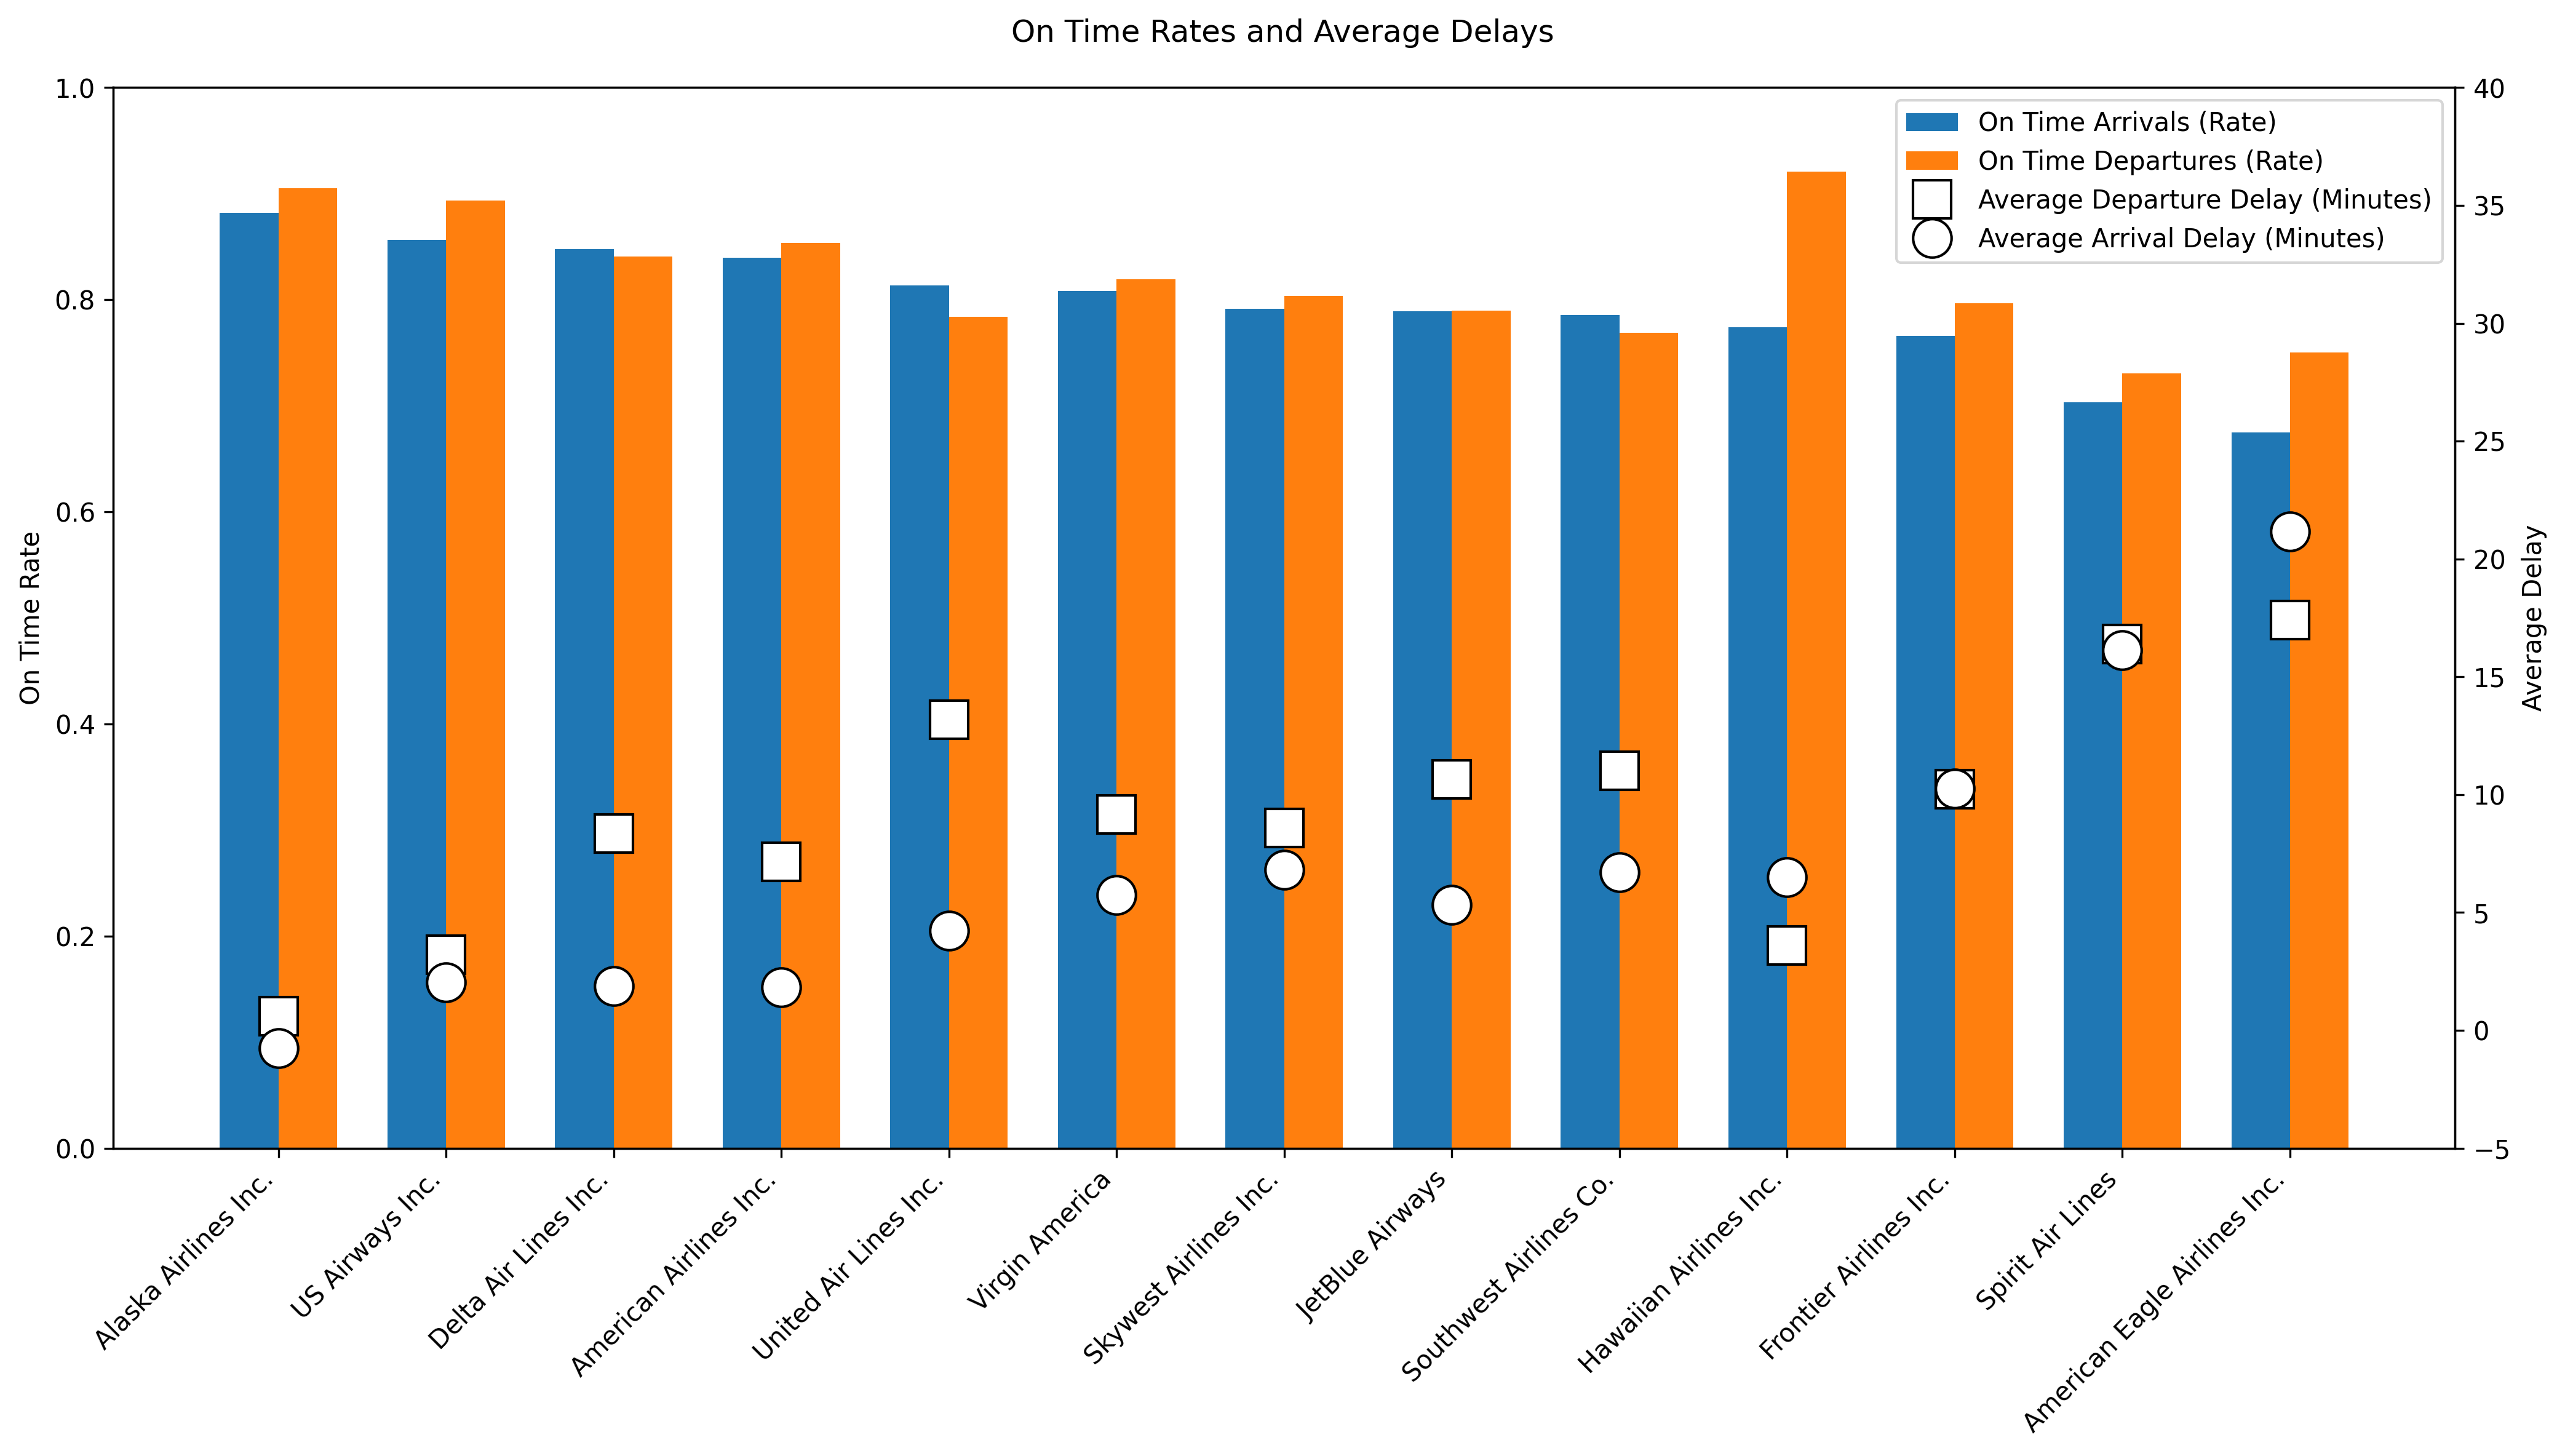

In [6]:
display(Image(filename="figures/reliable_airlines.png"))

**What this figure tells us?:** Alaska Airlines stands out as the most reliable carrier in the dataset, with the highest on time arrival and departure rates and even a slightly negative average arrival delay, indicating flights arrive early. US Airways, Delta Air Lines, and American Airlines also perform well, showing high on time rates combined with relatively low average delays. In contrast, American Eagle Airlines and Spirit Airlines rank lowest, showing both poor on time performance and the largest average delays. Large airlines like United Air Lines and Southwest Airlines operate many flights but suffer from high delays, telling us that scale may come at the cost of punctuality. Overall, the table and plot show big performance differences across airlines, with Alaska Airlines being the clear benchmark.

### Most Reliable Airport
**Why this feature?:** We were interested to see which Airport performed better with timing since many airports also differ in many ways like capacity constraints, the enviornment and congestion levels. With this comparison, we can see which airports tend to have more delays for California Departures.

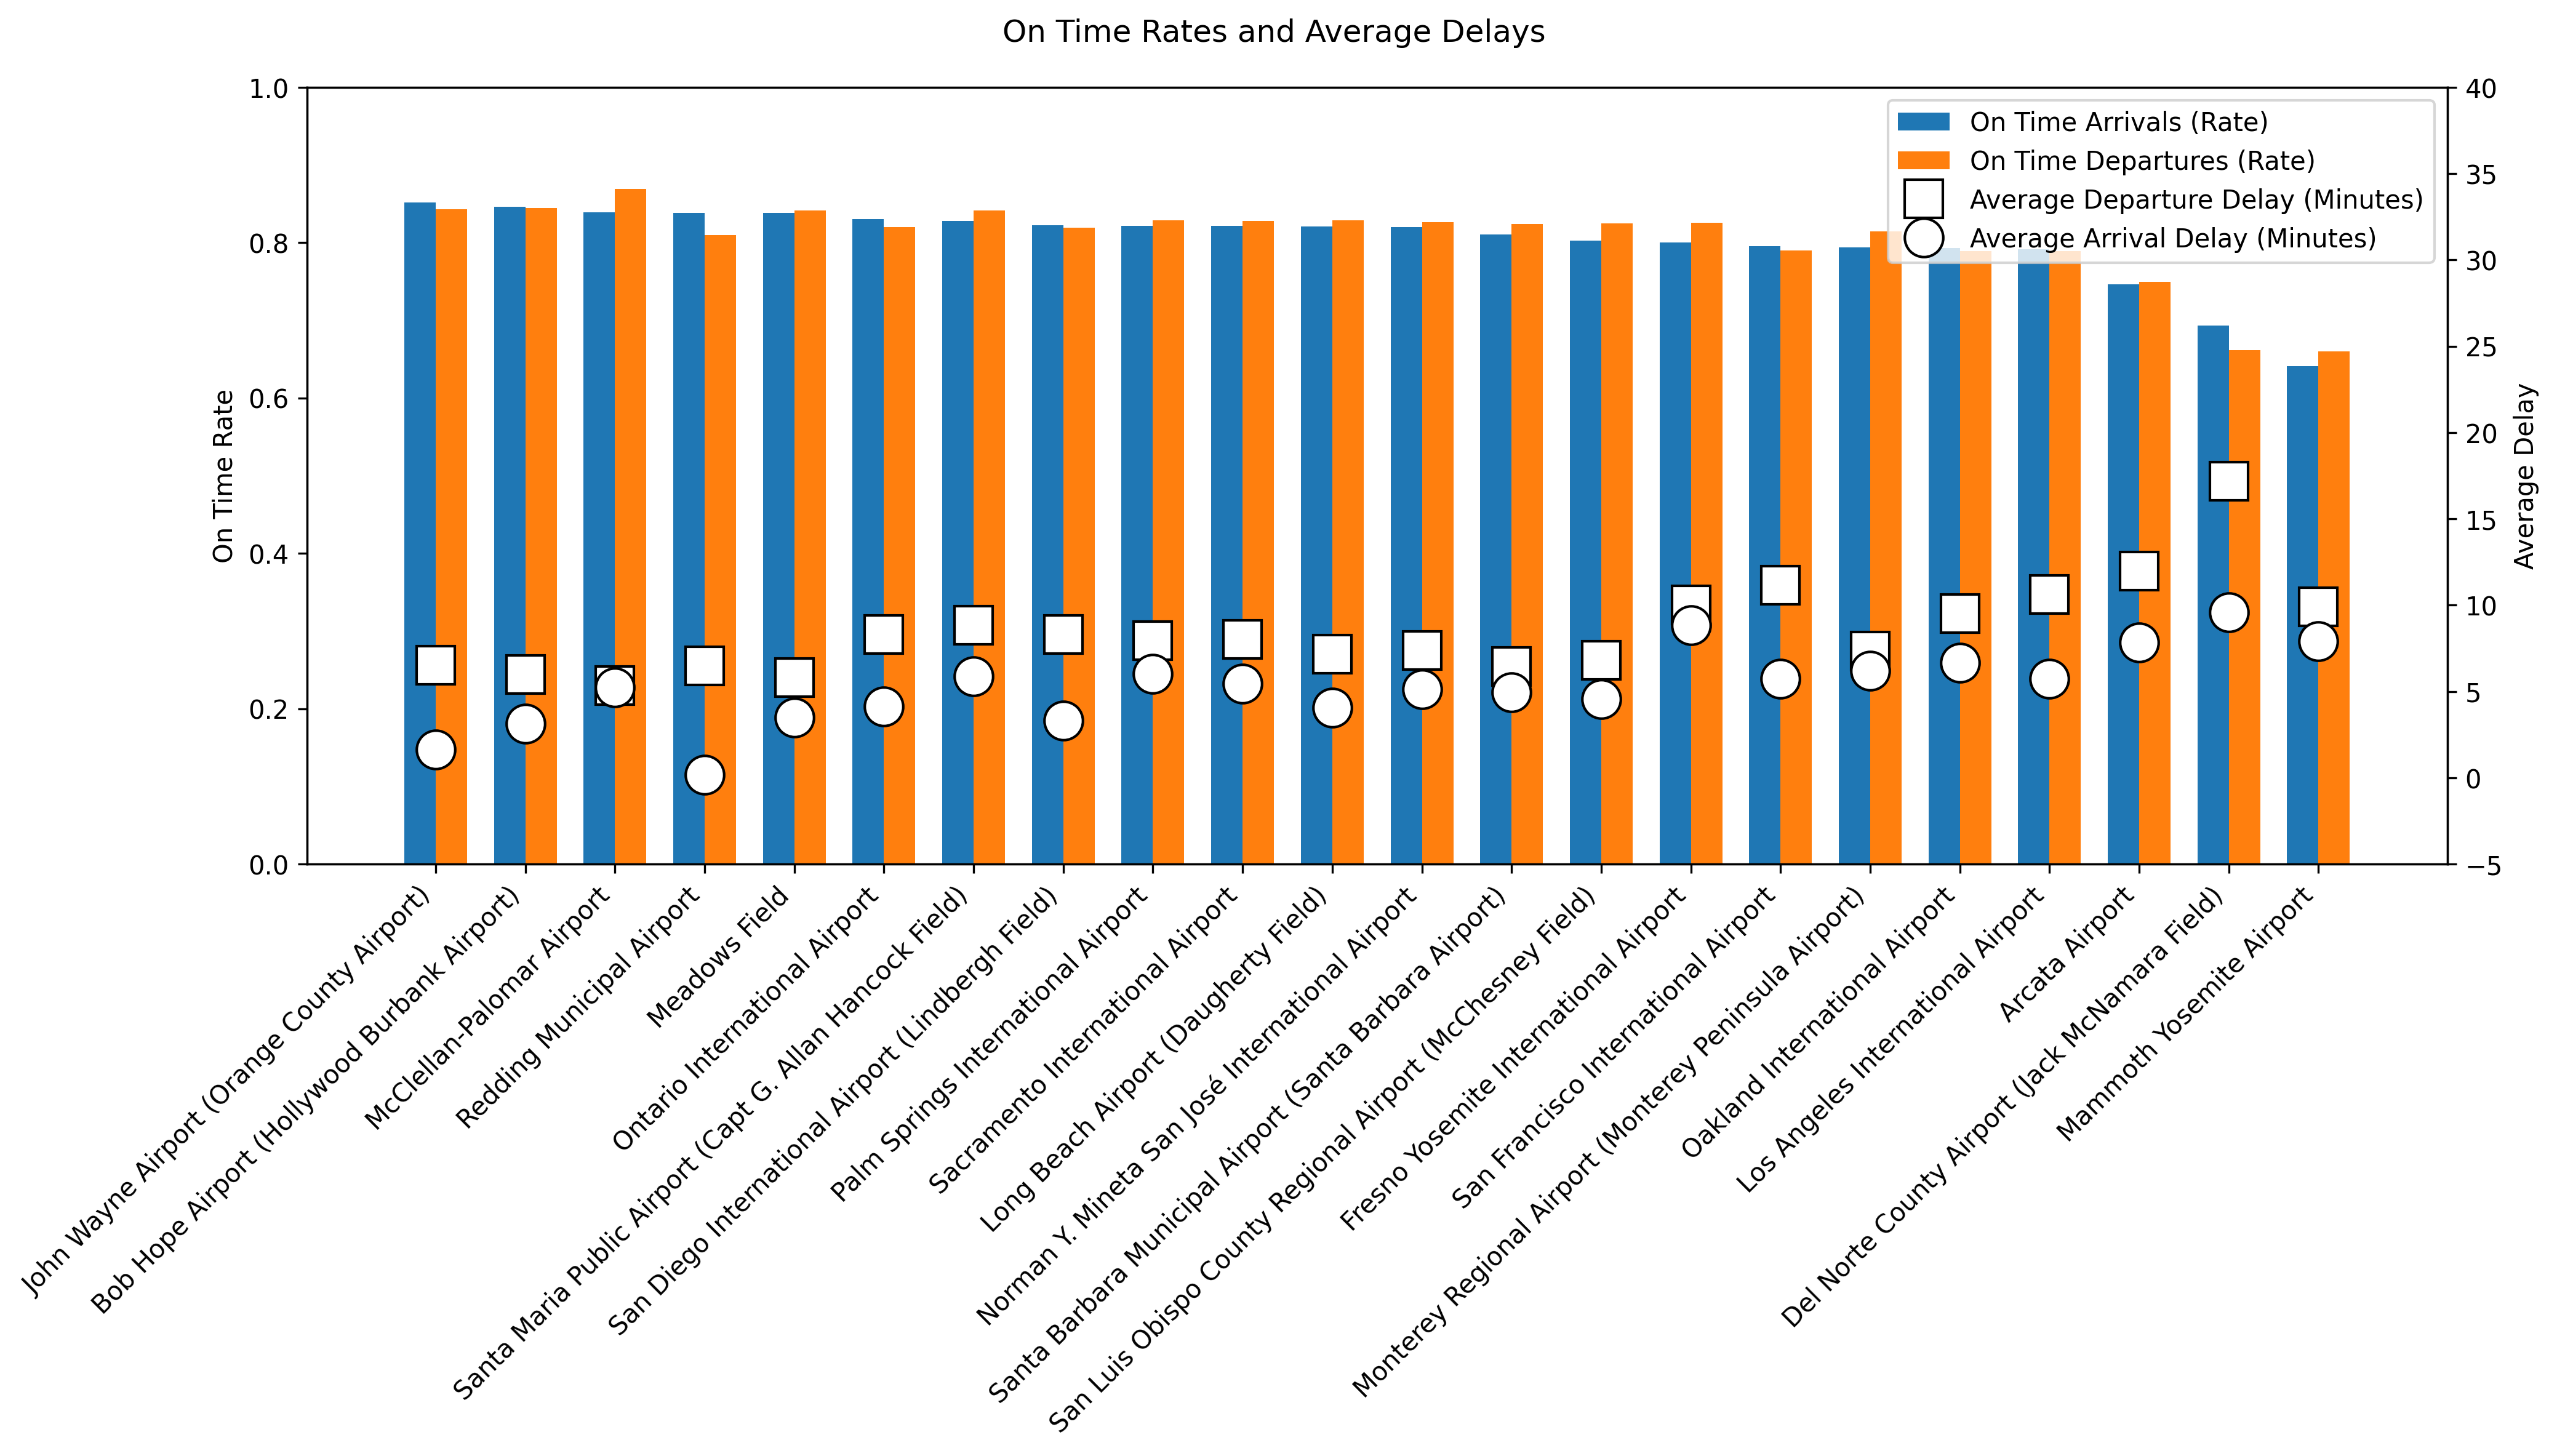

In [7]:
display(Image(filename="figures/reliable_airports.png"))

**What this figure tells us?:** John Wayne Airport is the most reliable airport, with the highest on time arrival and departure rates and relatively low average delays. Bob Hope Airport, McClellan–Palomar Airport, and Redding Municipal Airport also perform strongly, showing efficient operations despite big differences in the flight volume of the airports. In contrast, Mammoth Yosemite Airport, Del Norte County Airport, and Arcata Airport rank the lowest, with substantially worse punctuality and the highest average delays, suggesting capacity-related challenges at smaller airports. Larger airports like Los Angeles International Airport and San Francisco International Airport handle very high traffic volumes but show worse punctuality. In summary, airport performance varies a lot, and this is not just explained by airport size.

## Clustering amongst Airlines and Airports
**Why this feature?:** This cluster feature is to see if airlines and airports will form their own cluster groups when it comes to delays.

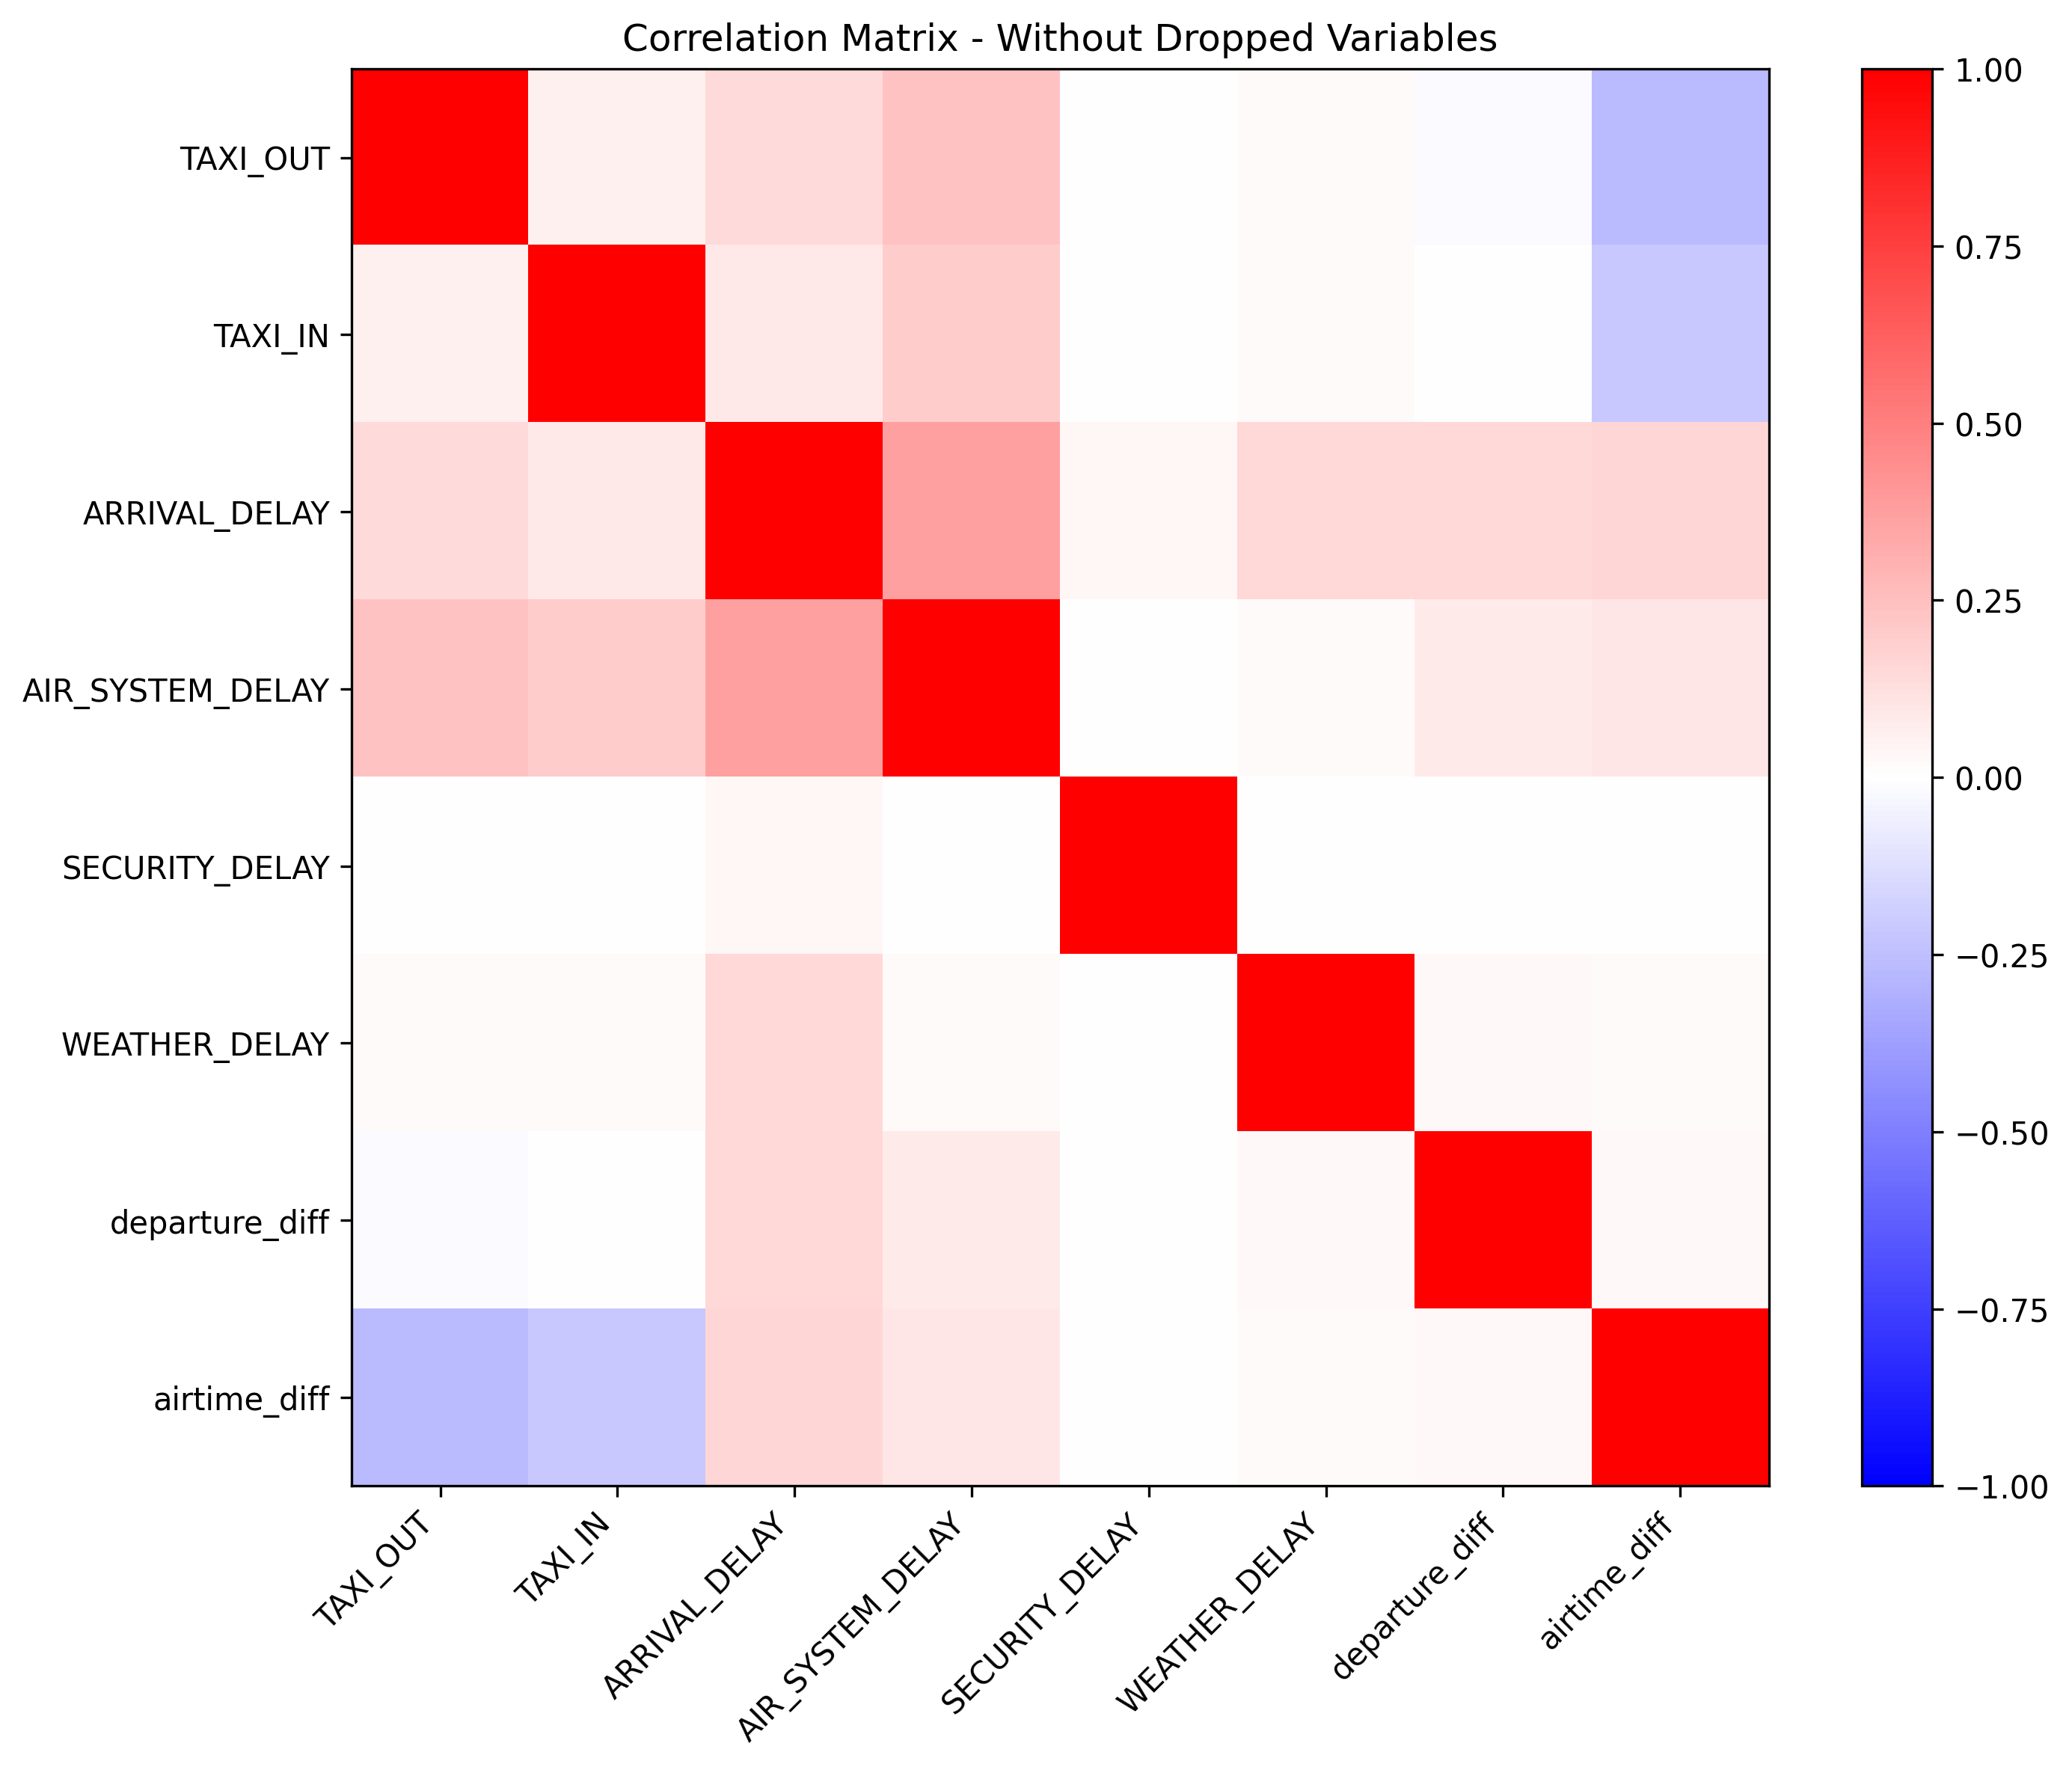

In [8]:
display(Image(filename="figures/correlation_partial.png"))

For clustering, we filtered through variables and found the above correlations which lead us to a hierarchical clustering to see which airlines and airports cluster together with respect to delays. 

From here, we grouped the data on airlines and airports, respectively. We aggregate on the mean, standard deviation, and the 10% and 90% quantiles of each of the remaining variables, to obtain an informative summary of both central behavior and tail behavior for each airline and airport. The dendrograms are shown below. 

### Airline Hierarchy
**Why this feature?:** It is interesting to see if certain airlines group together according to specific variables like size of airline company or luxury style adopted by the airline, etc.

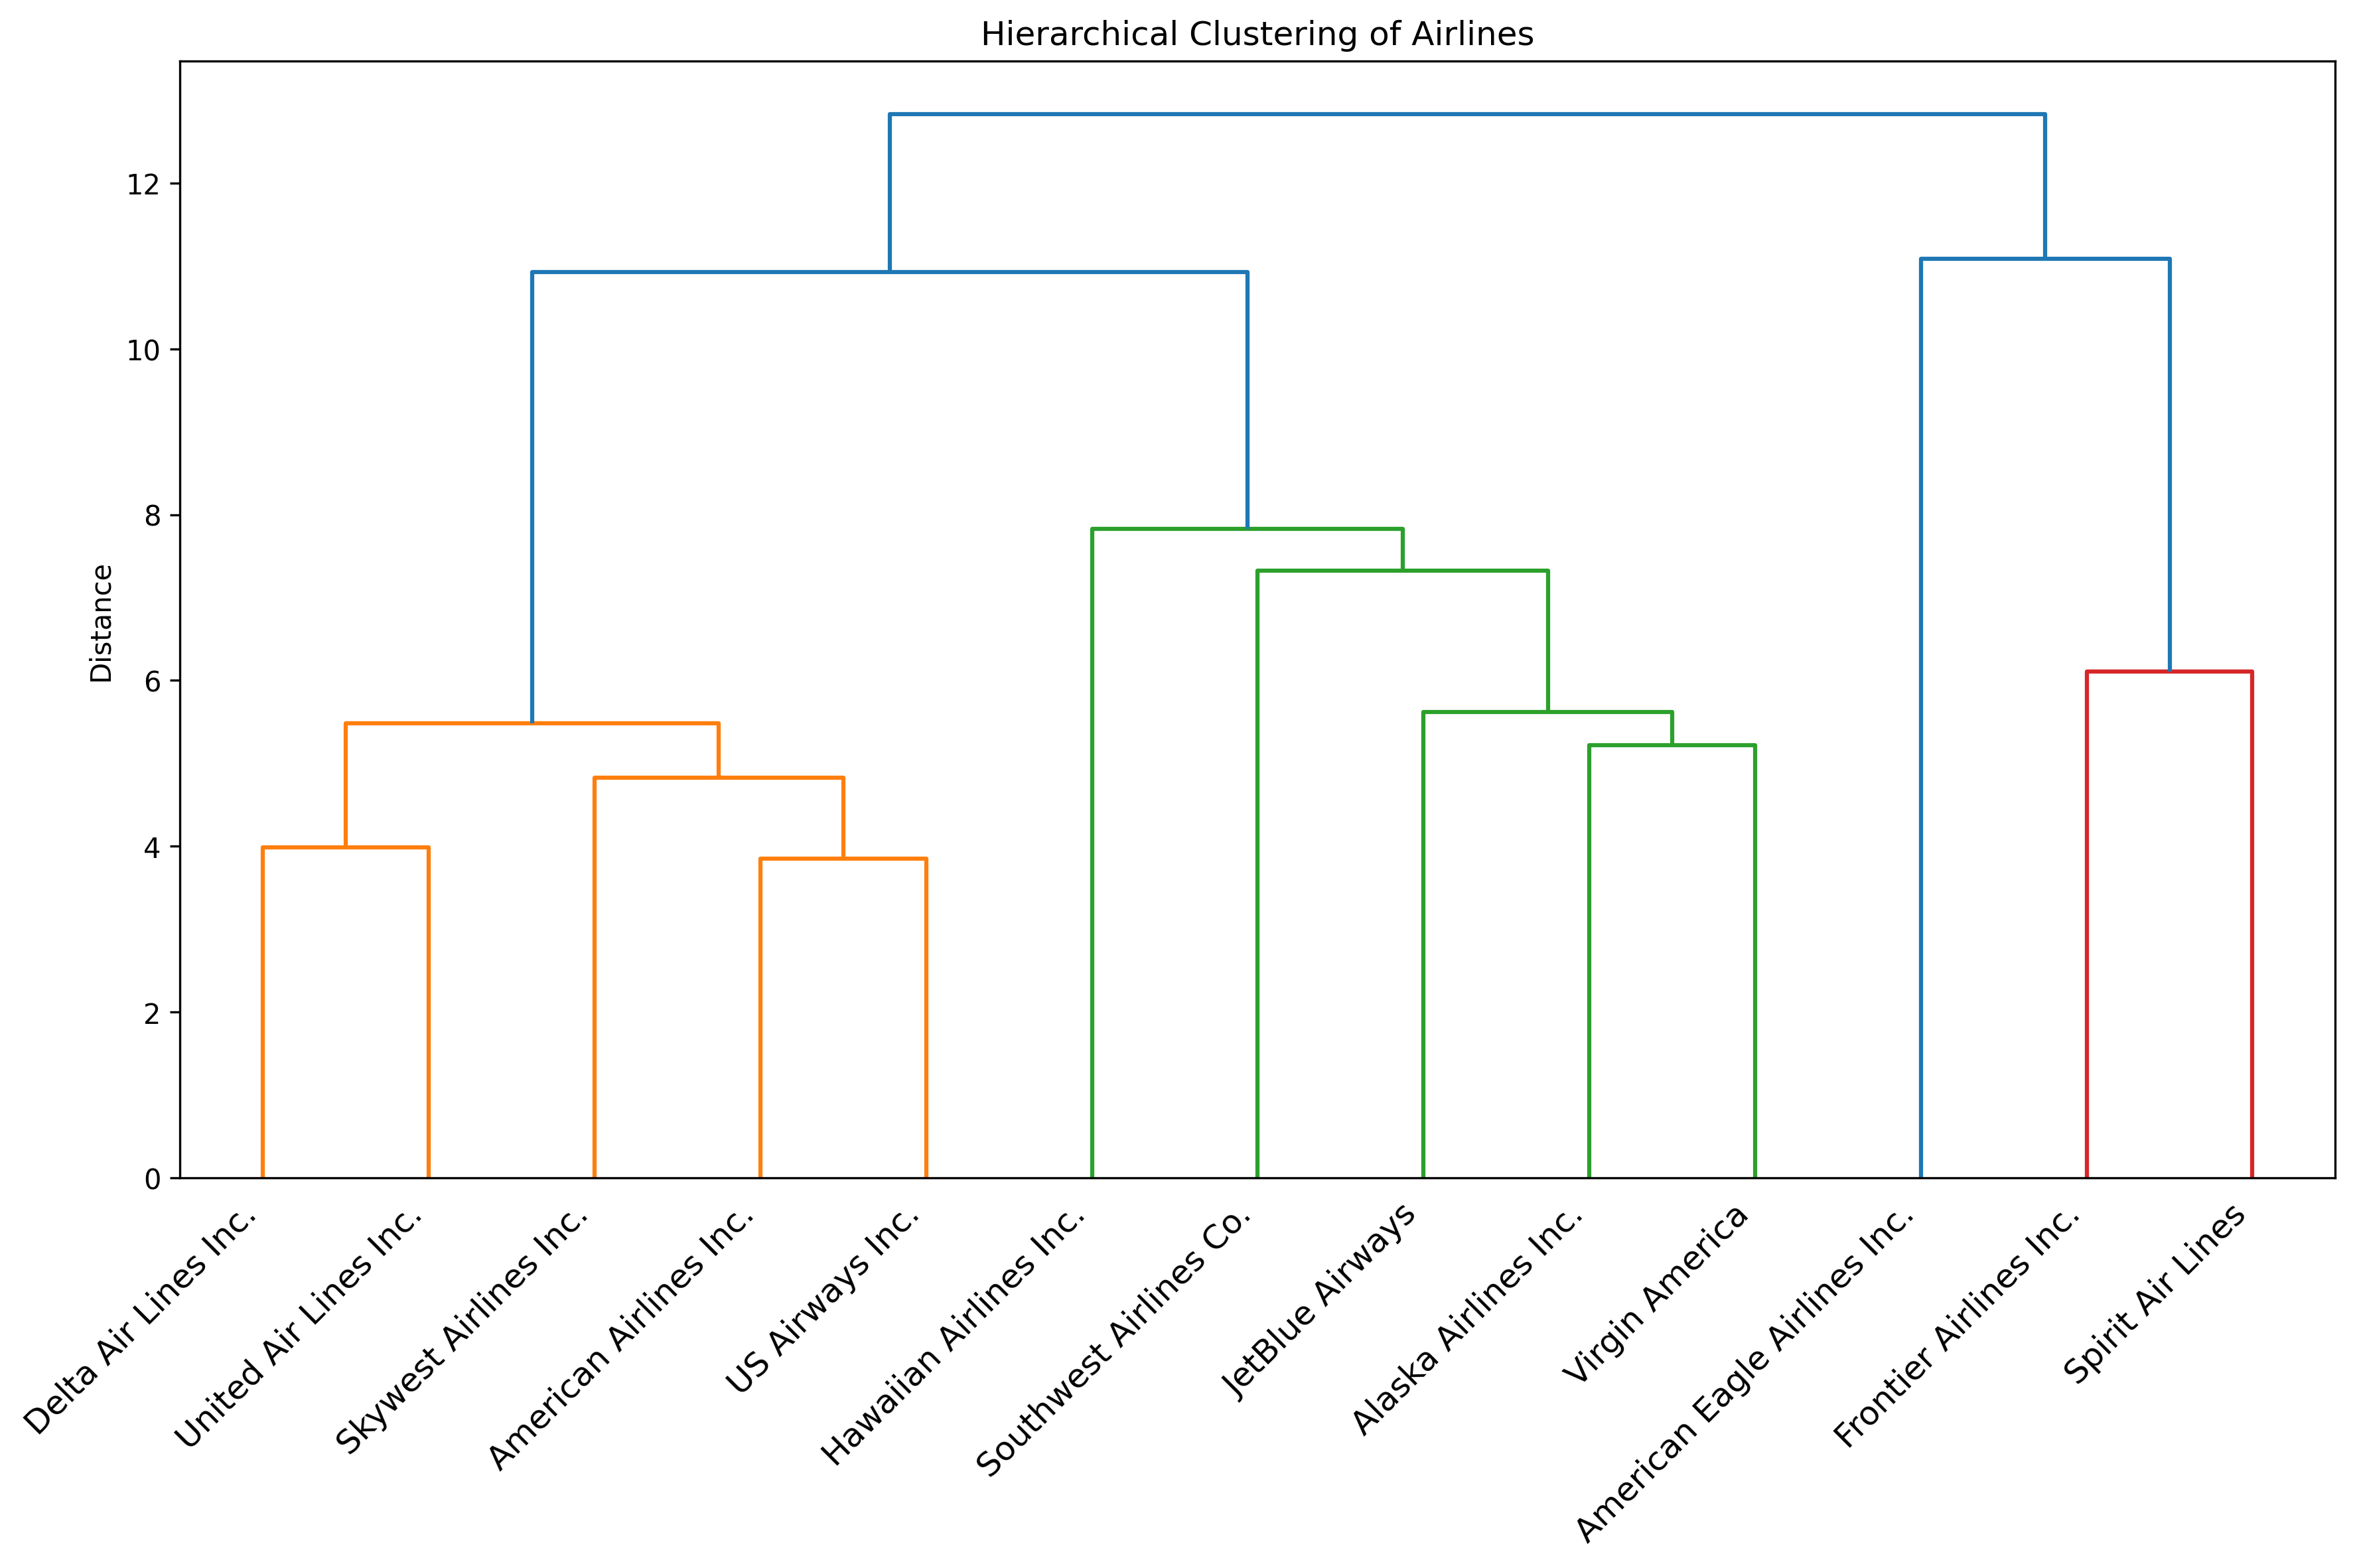

In [9]:
display(Image(filename="figures/clustering_airlines.png"))

**What this figure tells us?:** The dendrogram for the airlines shows three main performance-based clusters among the airlines, and one airline that stands out from the rest. Delta, United, SkyWest, American, and US Airways form a cluster, indicating very similar behavior in terms of delays and reliability. Hawaiian, Southwest, JetBlue, Alaska, and Virgin America group into a second cluster, suggesting an internally consistent performance profile that differs from the first group. Frontier and Spirit clearly separate into their own cluster, showing that these two airlines have substantially different performance characteristics compared with the other carriers. Lastly, American Eagle is in its own bucket, showing that it is not that similar with respect to delays to the other airlines. In summary, the dendrogram shows strong similarity with respect to delays among traditional airline carriers, moderate similarity among large low-cost carriers, and a distinct outlier group consisting of very low-cost airlines.

### Airport Hierarchy
**Why this feature?:** It is interesting to see if certain airports group together according to specific variables like location or size of the airport or popularity, etc.

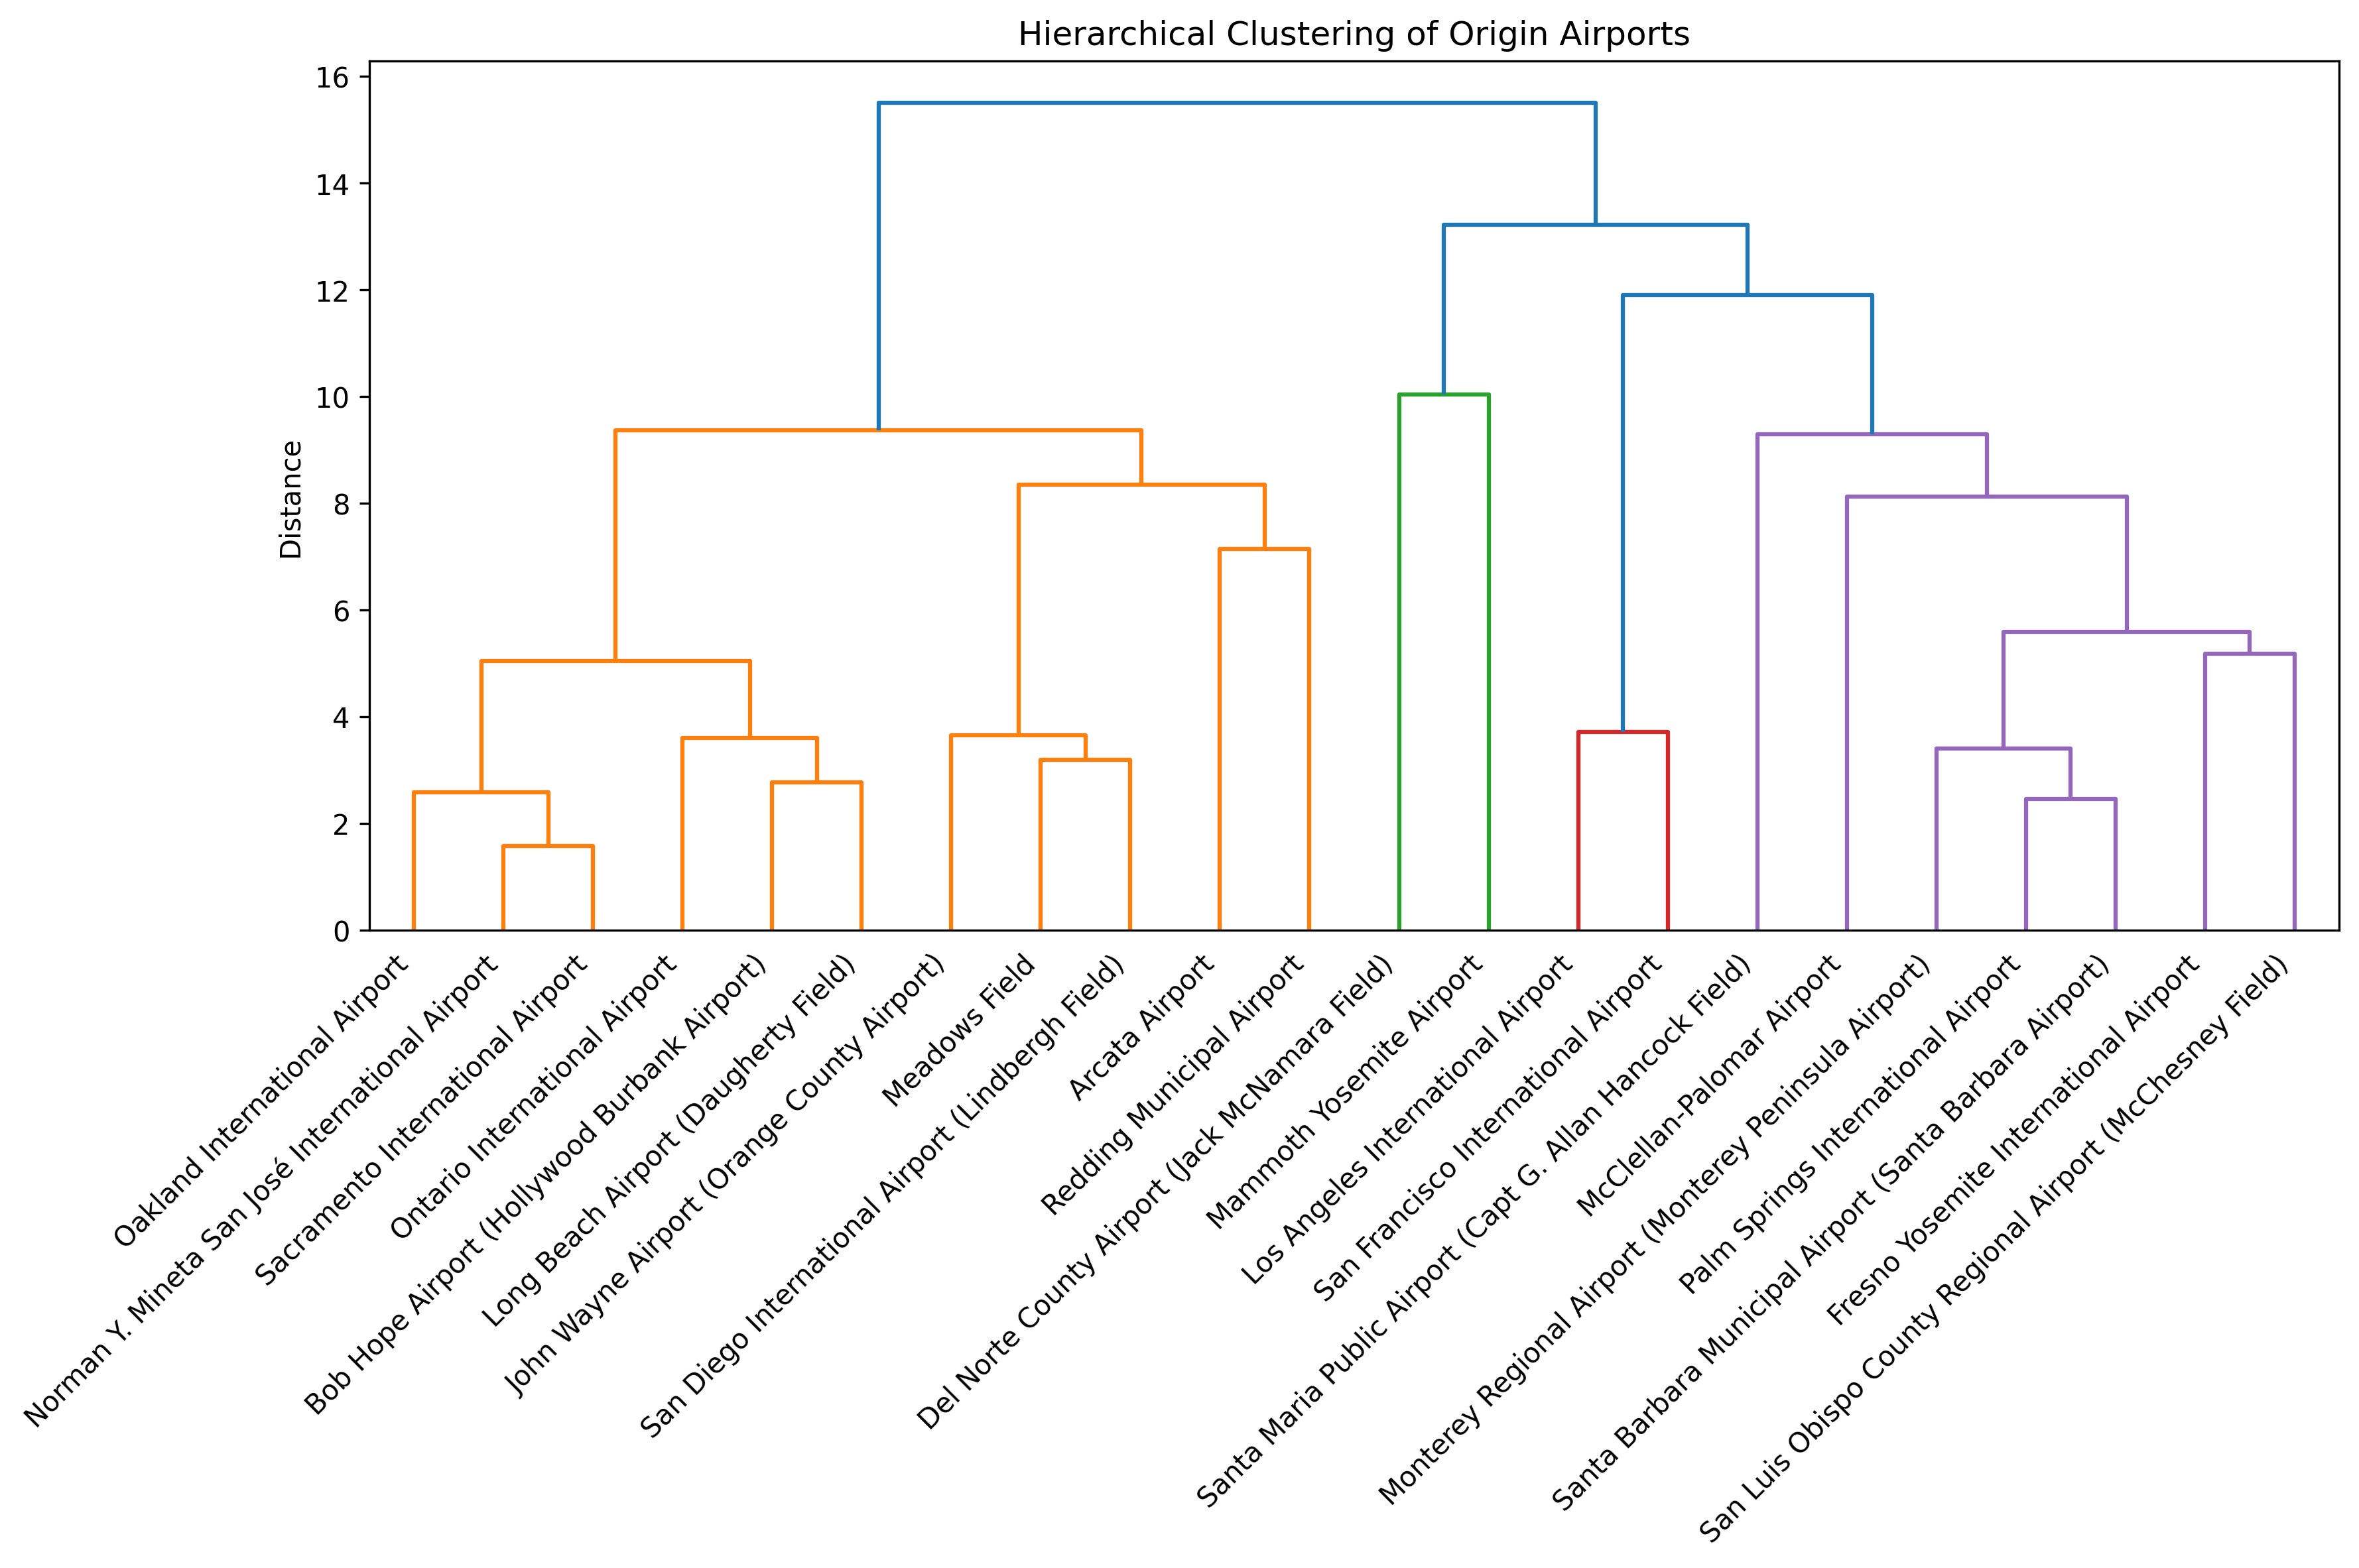

In [10]:
display(Image(filename="figures/clustering_airports.png"))

**What this figure tells us?:** The dendrogram for the airports shows that large hubs like Oakland, San José, Sacramento, Ontario, Bob Hope, Long Beach, John Wayne, Meadows Field, San Diego, Arcata, and Redding group together. Ths indicates similar operational behavior typical of high-traffic airports (with a few outliers present, that you would maybe not expect to have the same delay characteristics). 
A second, clearly separated cluster is formed by the Los Angeles and San Francisco airports, which stand out as extreme hubs with distinctly different delay characteristics compared to all other airports. 
The two smaller regional airports Del Norte and Mammoth Yosemite form another distinct group, showing structurally different and more unstable performance patterns driven by low traffic volumes. Finally, we have a cluster with the medium-sized regional airports Santa Maria, McClellan-Palomar, Monterey, Palm Springs, Santa Barbara, Fresno, and San Luis Obispo. In summary, the dendrogram shows that airport performance is highly structured by the size with major hubs, regional airports, and small local airports forming very distinct groups.

## Months, Days, Weekdays, and Hours

### Monthly Delay Analysis
**Why this feature?:** We were curious to see in what months did more delays occurr compared to other months. This section explores how flight delays vary across different months of the year, examining both average delays and on-time rates.

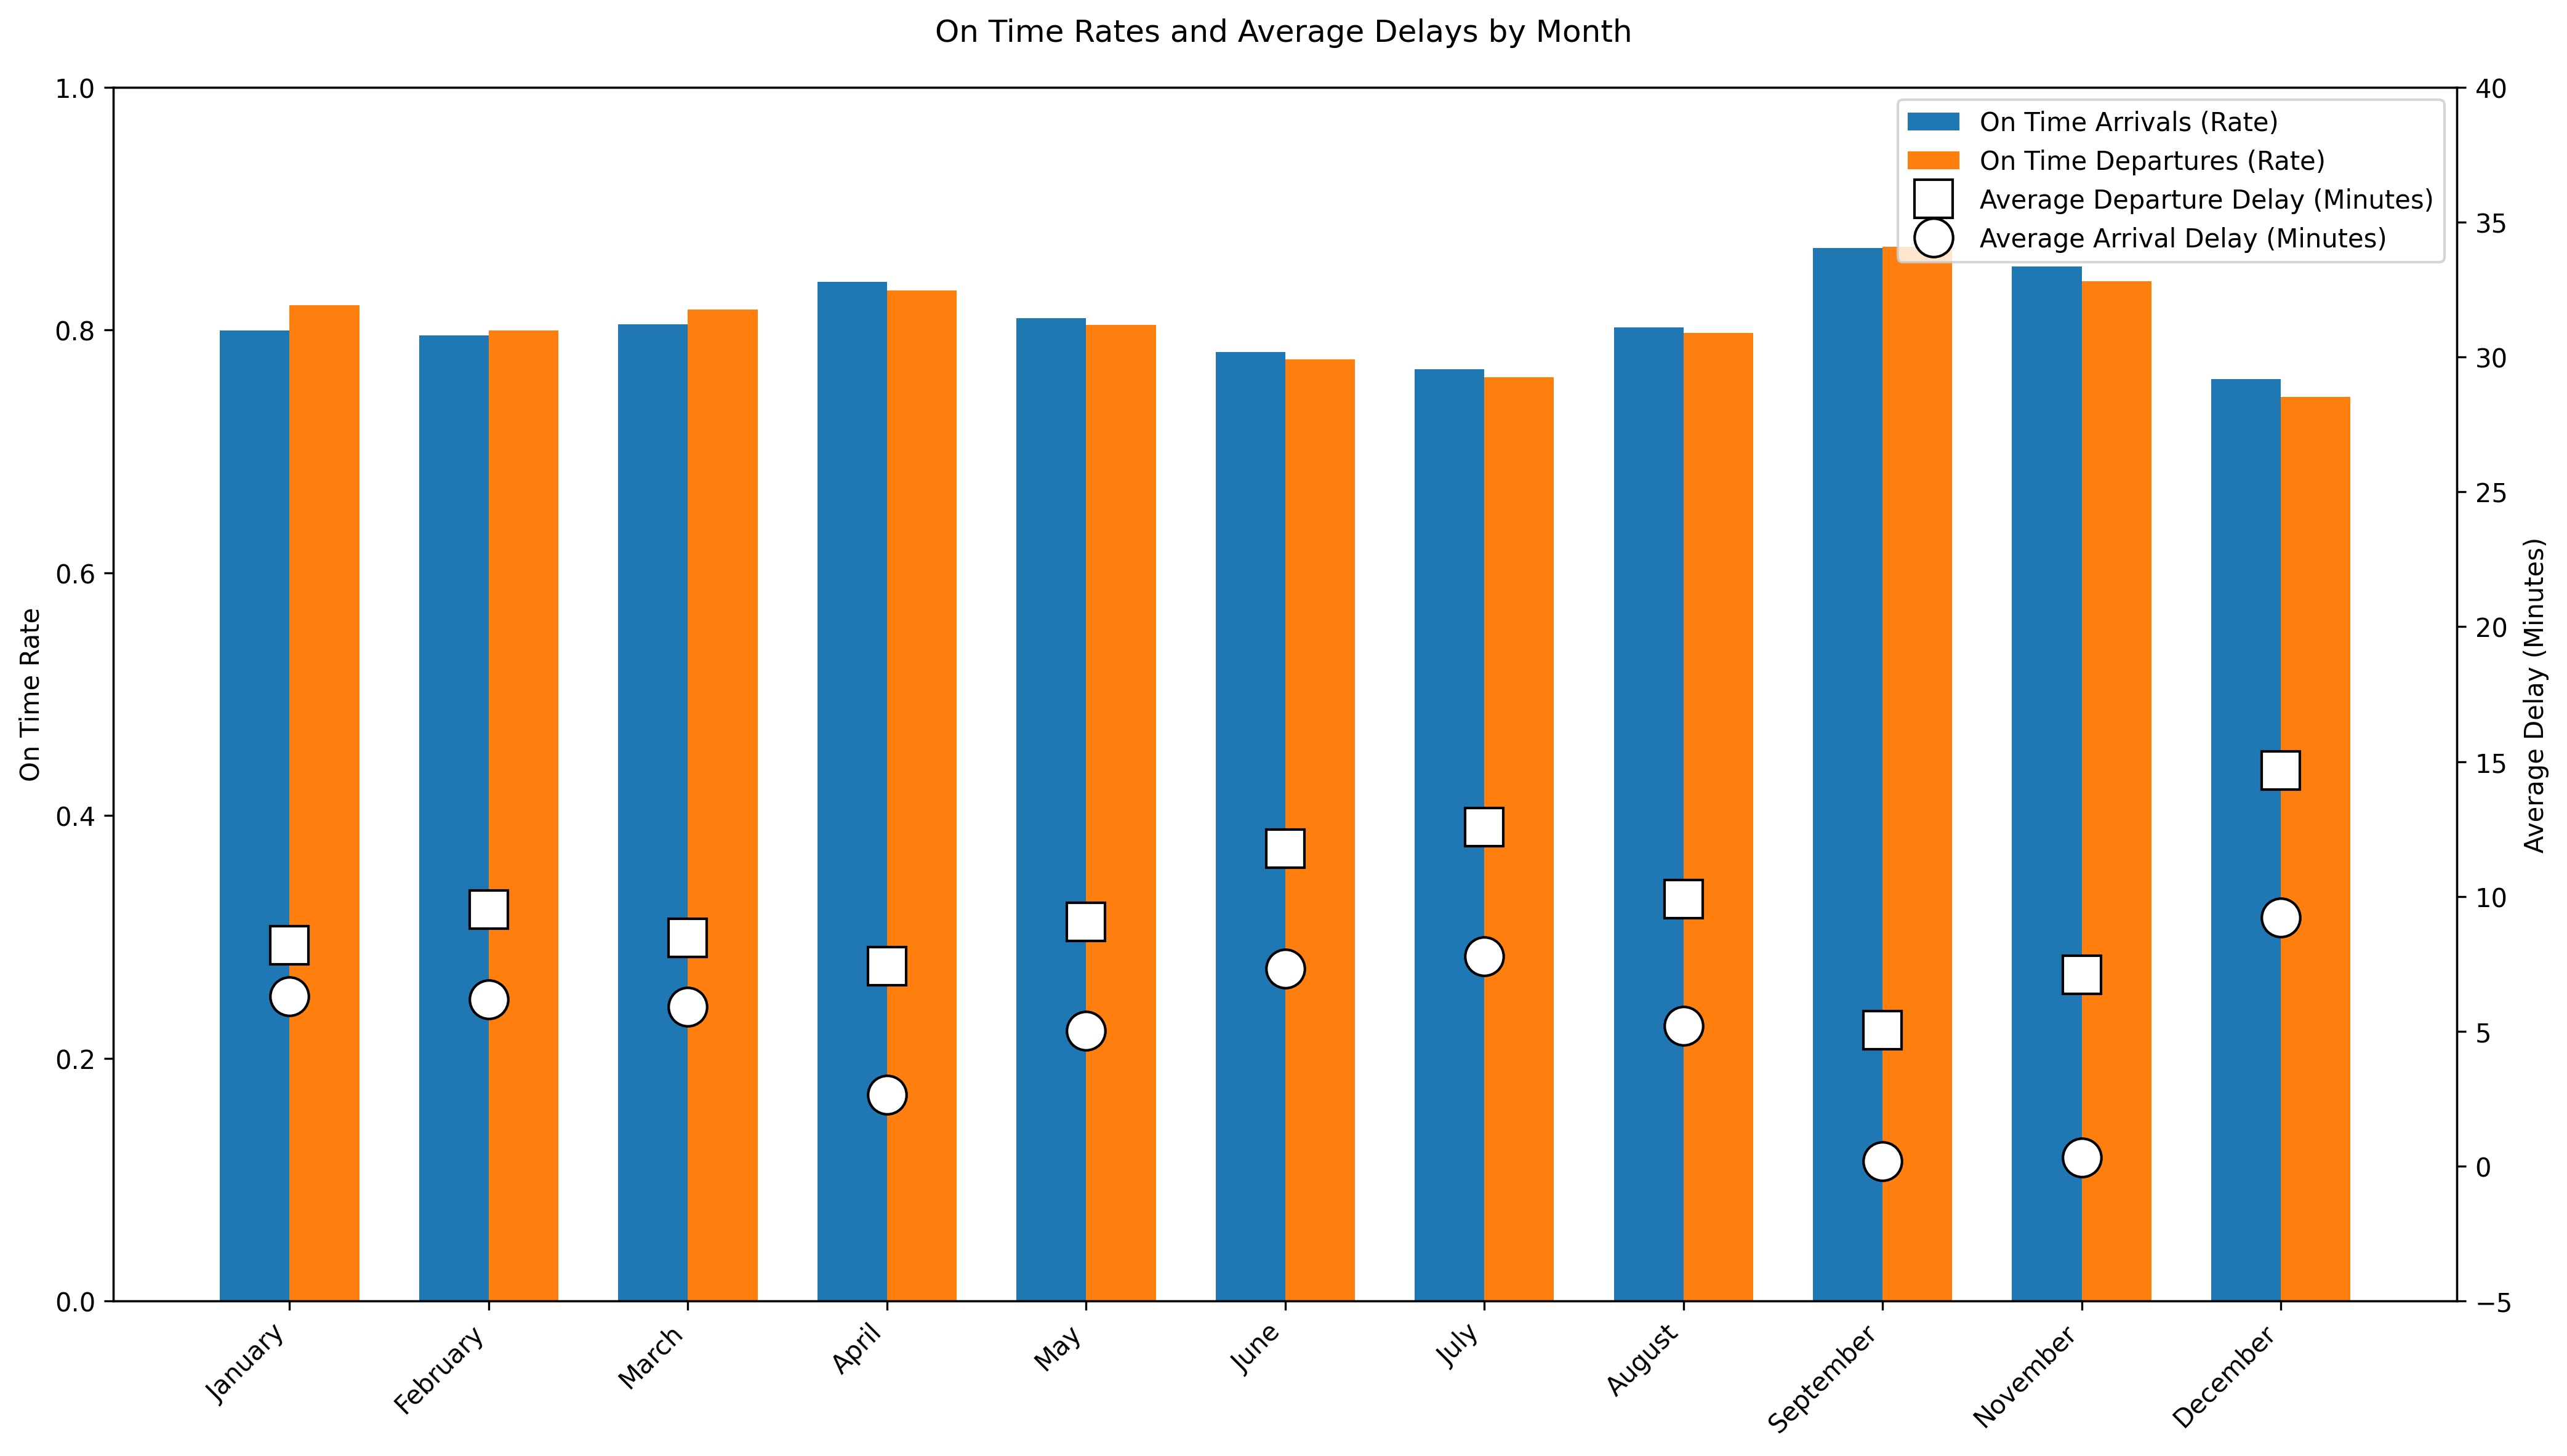

In [11]:
display(Image(filename="figures/delays_by_month.png"))

**What this figure tells us?:** This figure shows that the month of September is the most reliable month to fly during 2015 in which the departure and arrival on-time rates are the highest compared to all other months AND the average departure and arrival delays are at their lowest compared to other months. This graph shows that the fall months are the most reliable since there are less people traveling and the weather is stable so airlie staff are able to operate with minimal strain compared to other months. Overall the summer months and December have the lowest departure and arrival on-time rates with high arrival and departure delays. This suggest seasonal congestion in which more people are trying to travel and/or the weather disrupts operations for both airlines and airports. In other words, delays are not random across the year.

### Daily Delay Analysis
**Why this feature?:** Examining delays by day of the month can give us insight into if flight reliability varies systematically within a month since we've already looked at seasons. Are there operational monthly cycles or accumulated network delays due to maintenance that could be affecting flights to be more delayed? A traveller could also want to know what day would be best to fly out in any given month so that they would experience the most reliable flight possible. 

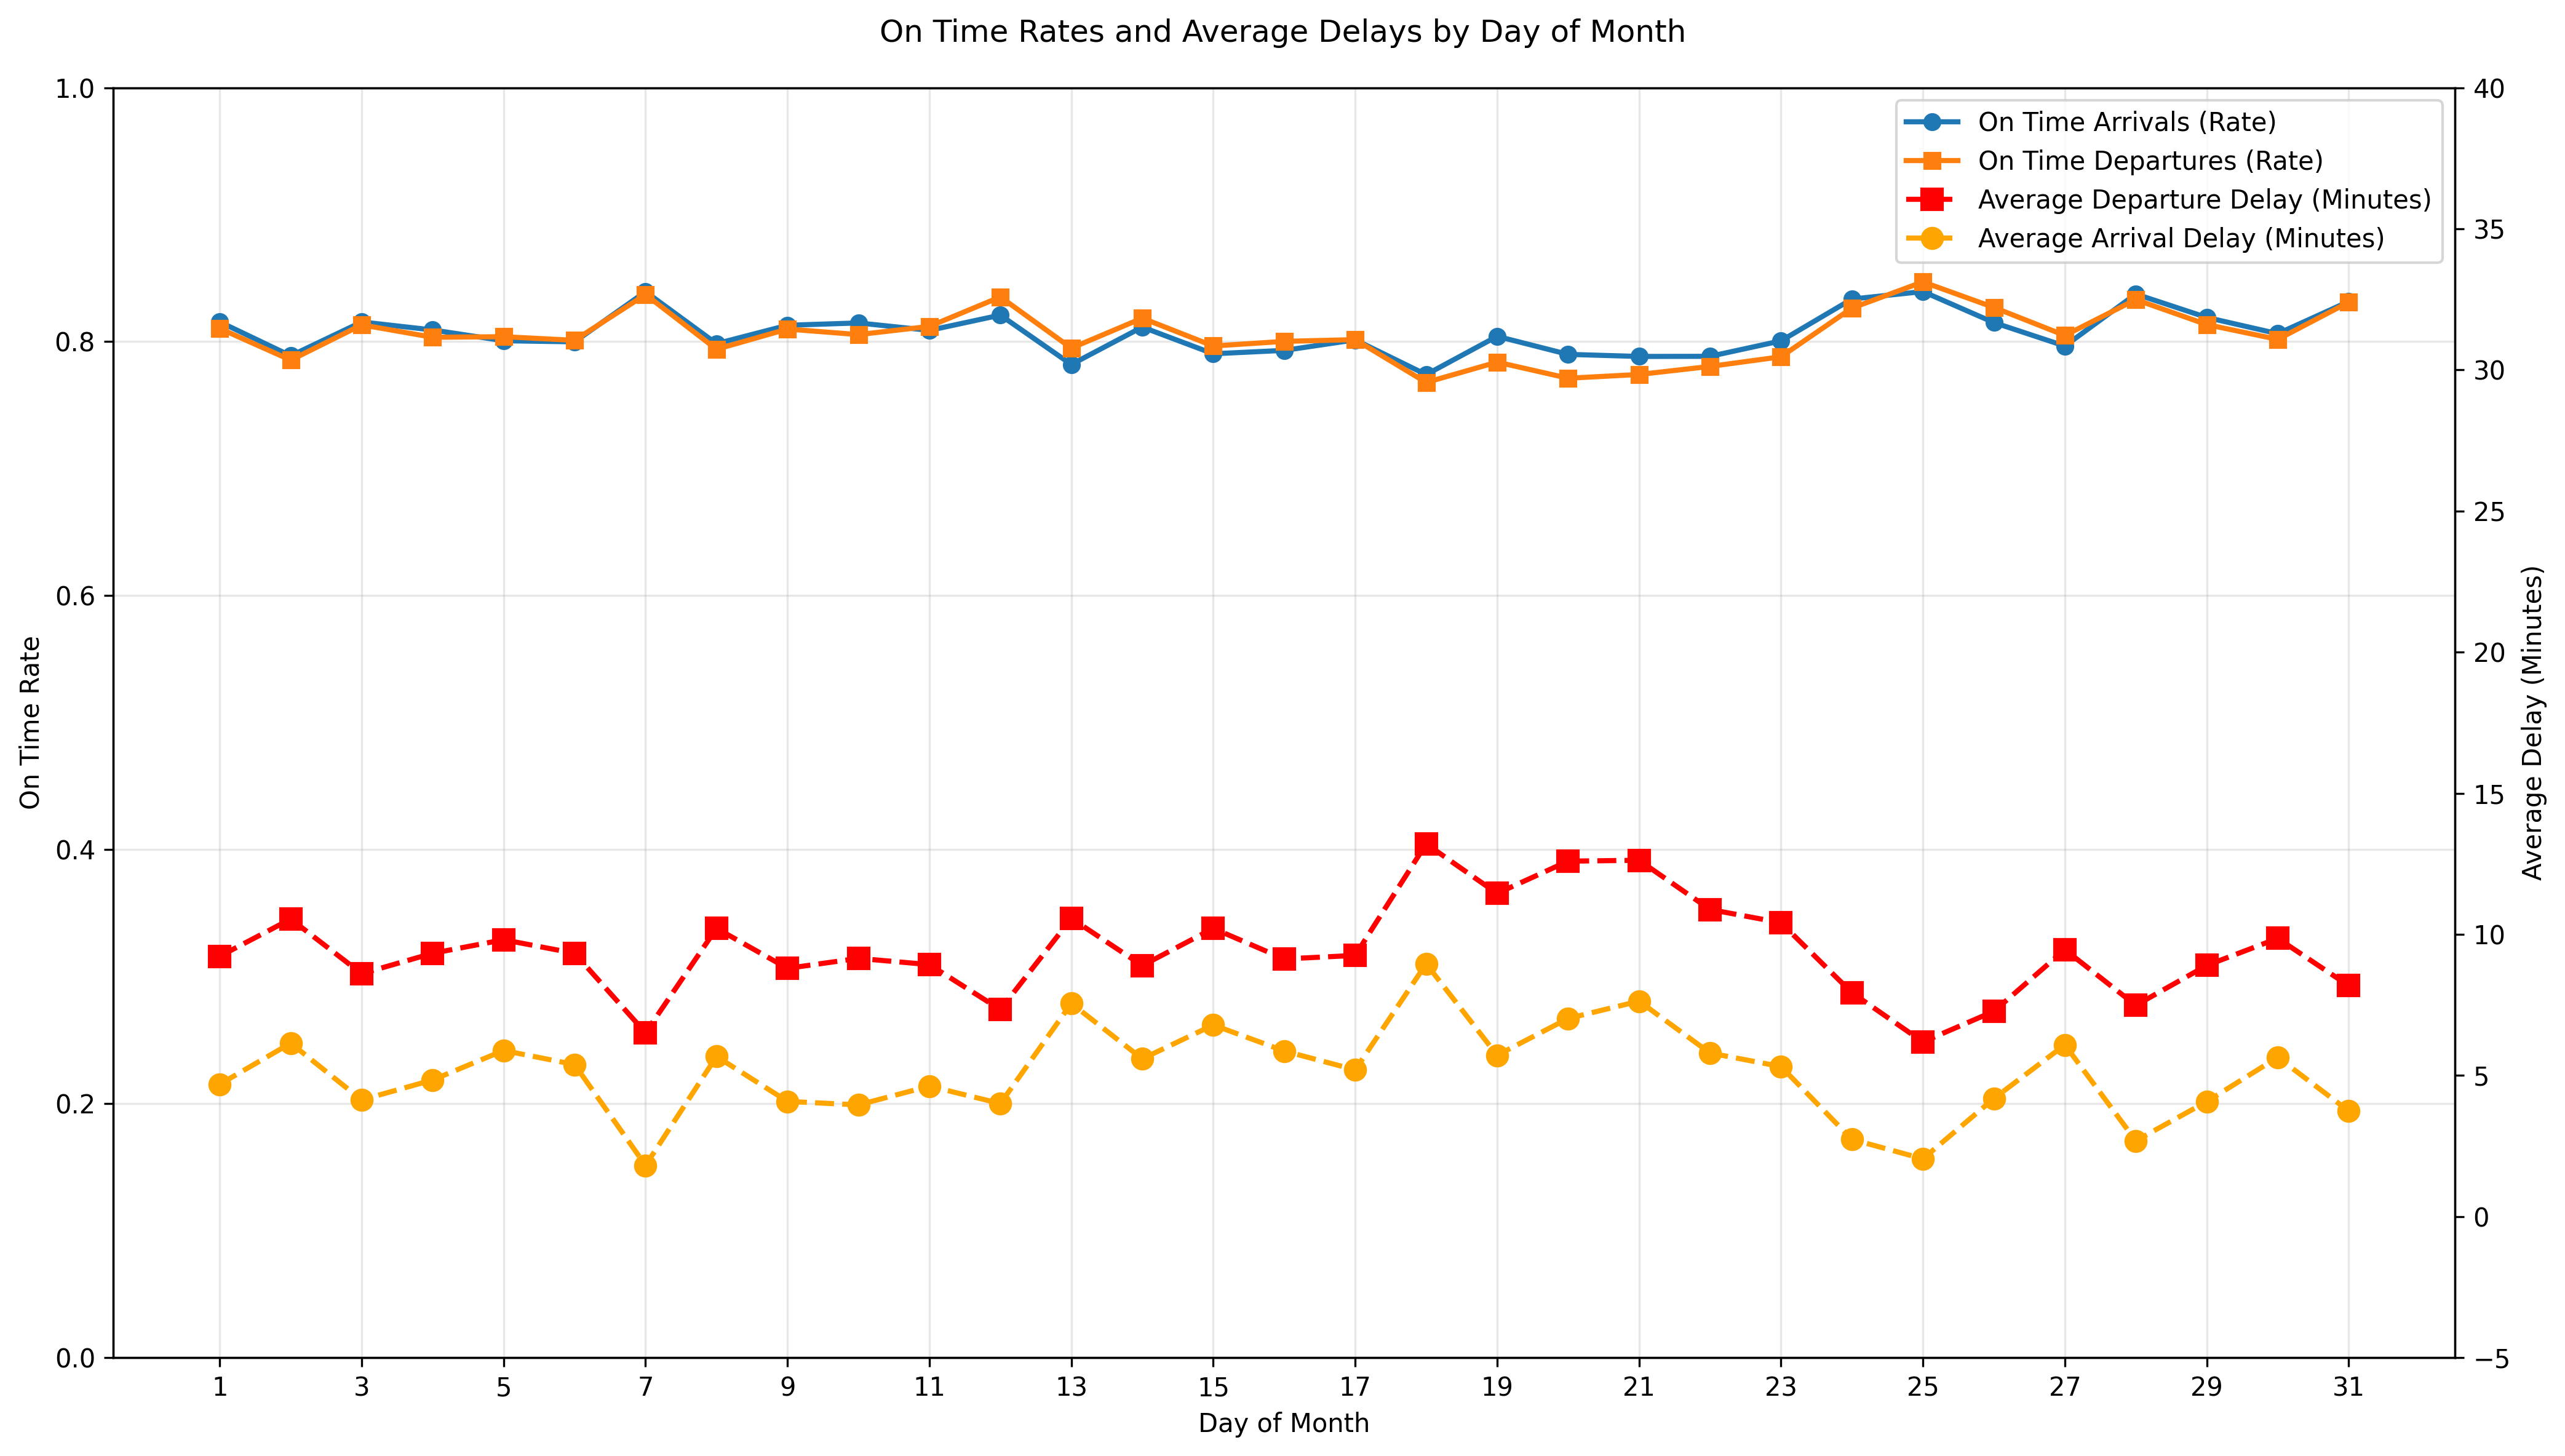

In [12]:
display(Image(filename="figures/delays_by_day.png"))

**What this figure tells us?:** Overall, flights do not dramatically vary by day of month but this figure does show increased delays towards the middle of the month. In other words, flight reliability on a day to day basis during a month is stable since the on-time arrivals and departures rates stay above 80% throughout the month. This suggest that day of the month has minimal effect on flight reliability compared to seasonal monthly factors.

### Weekday Delay Analysis
**Why this feature?:** Flight demands can vary from weekday to weekend days with business related travels happening more during the week and more leisurely travel happening on weekends. Is the volume of weekday travellers influencial enough to show that more delays happen during the week than weekends or does the amount of flights on the weekends show that delays happen more then? Examining delays by day of the week can help us identify recurring operational stress points. 

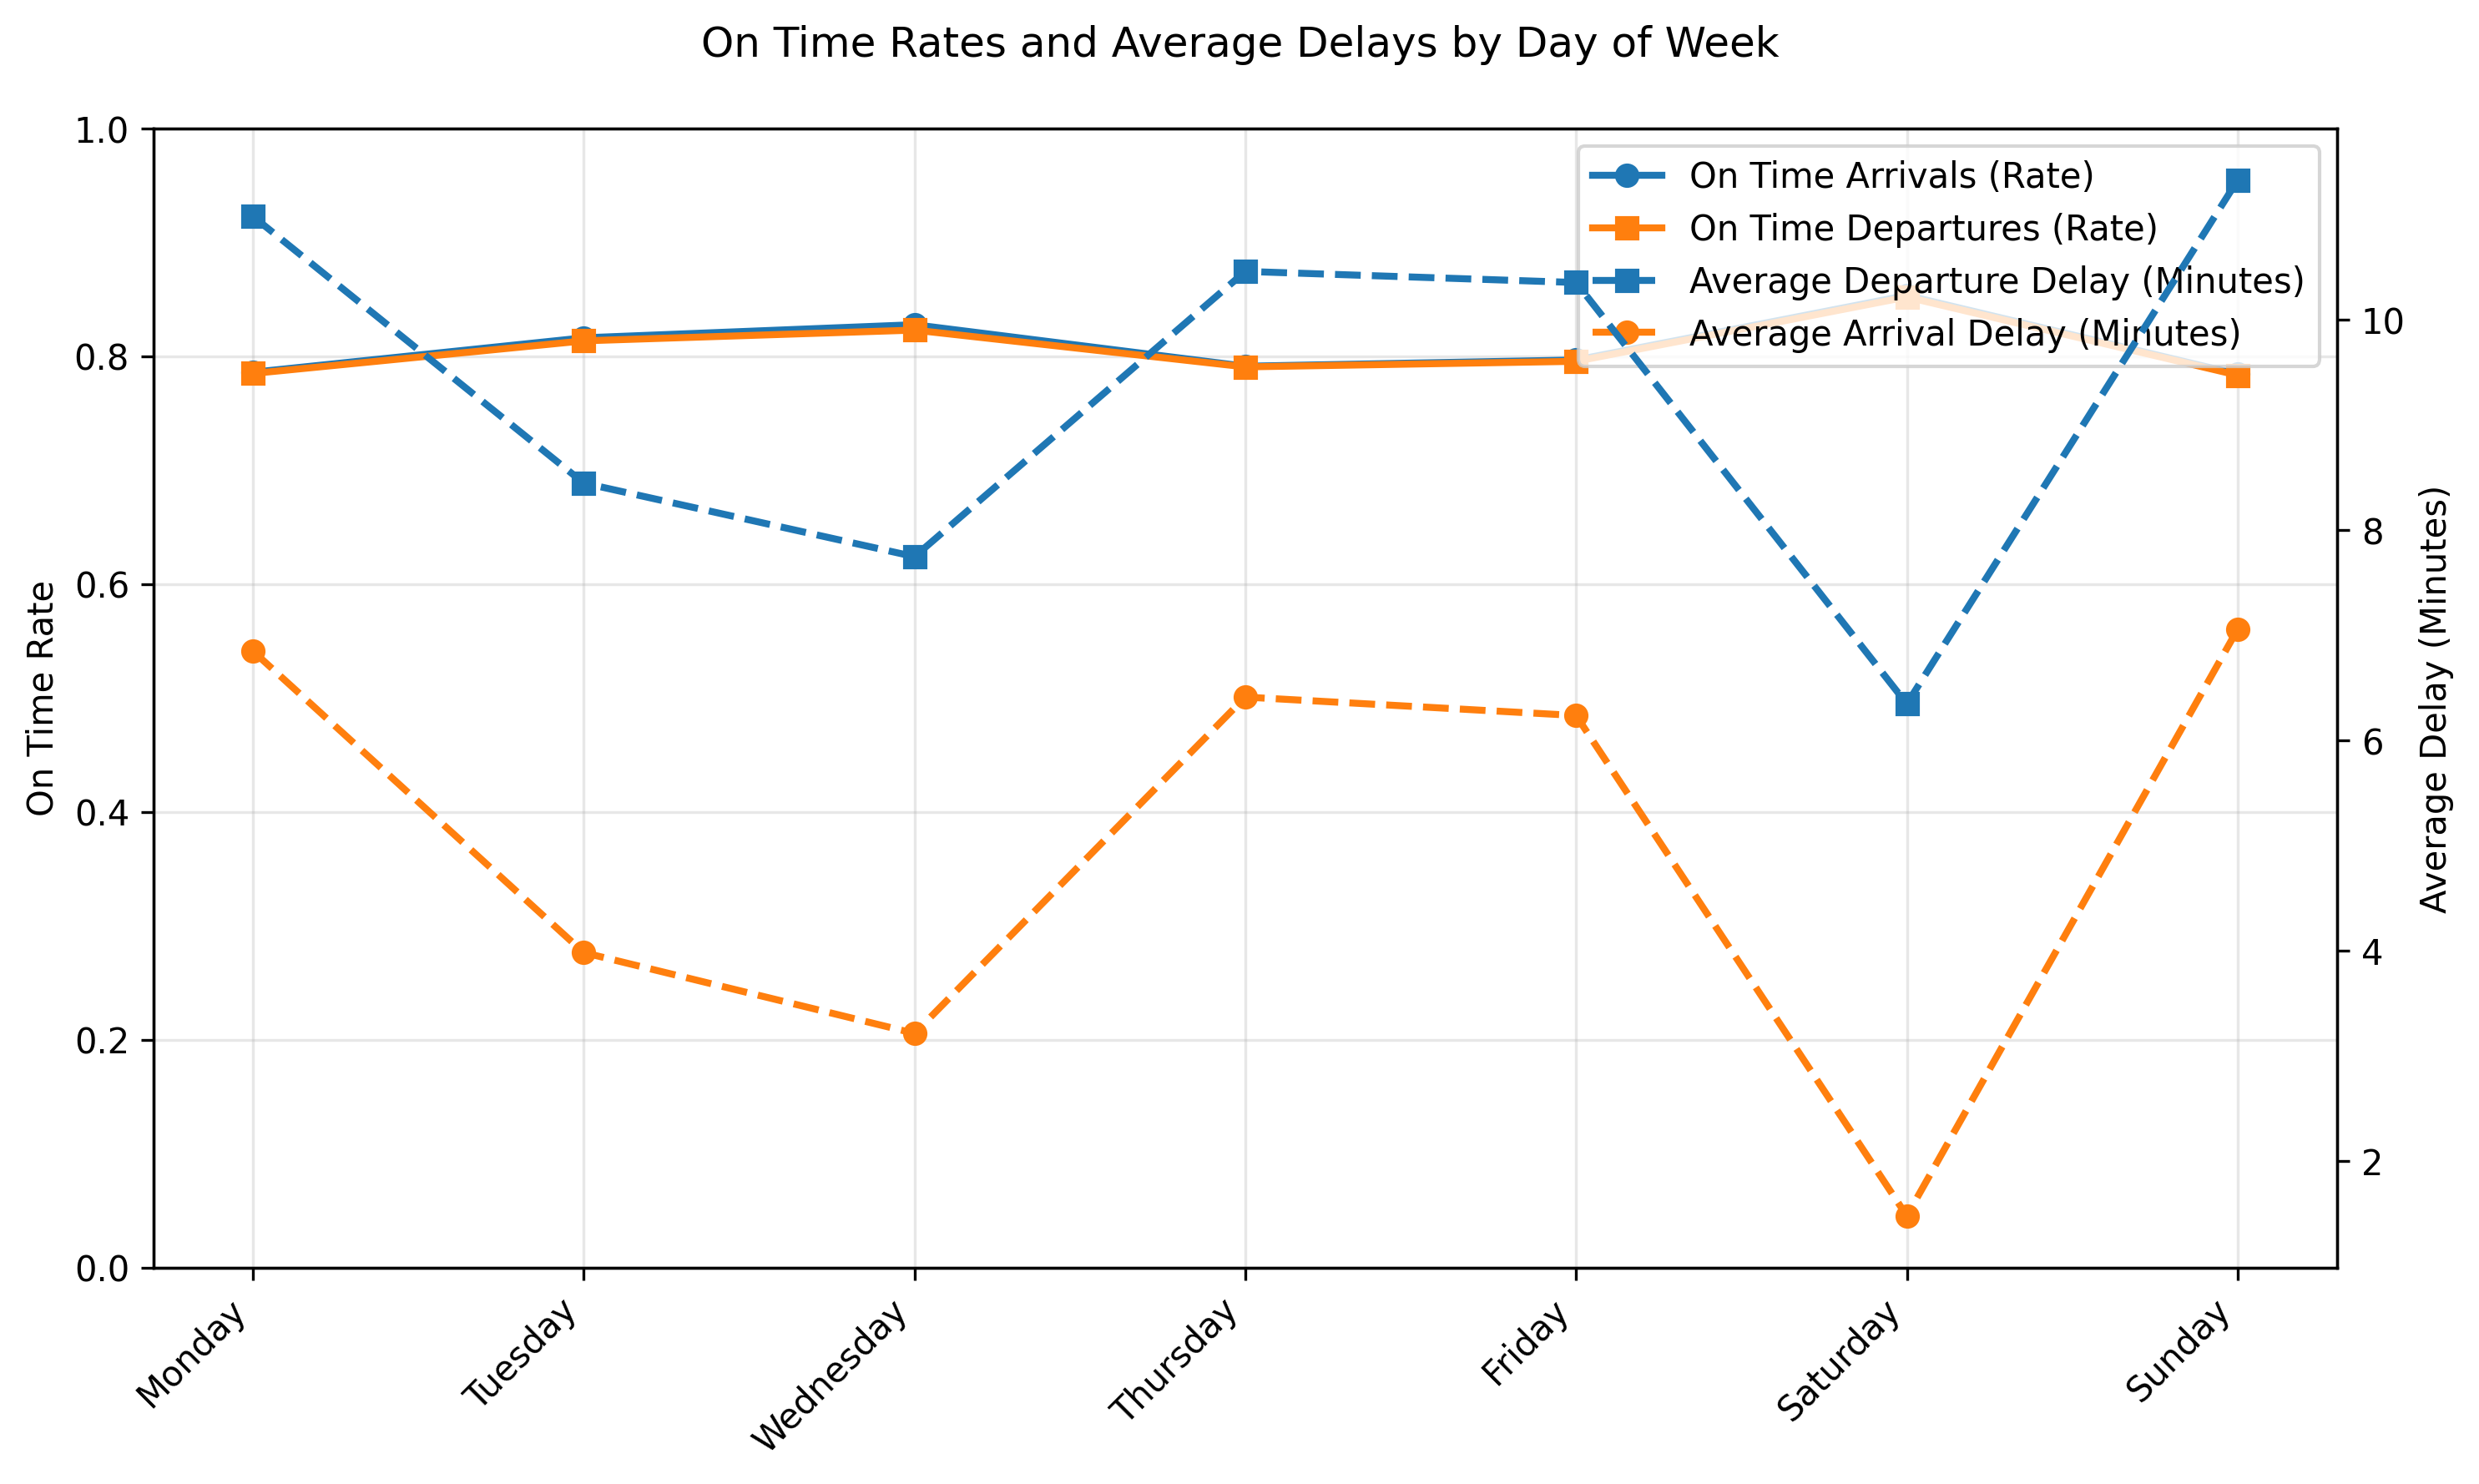

In [13]:
display(Image(filename="figures/delays_by_dow.png"))

**What this figure tells us?:** Flights during the week, specifically on Tuesdays and Wednesdays, are more reliable than late weekend flights. Tuesdays and Wednesdays have the highest on-time rates for both departure and arrivals along with the lowest delays which indicates these to be the most stable or reliable days to fly on. In contrast, Sundays and Mondays have the longest delays most likely due to increased travel demand at the start and end of the week. 

### Hourly Delay Analysis
**Why this feature?:** This feature highlights how often flights are on time during the day as well as how bad the delays are when they do happen simultaneously. We are interested in highlighting the reliability and severity of flights at any given hour of the day. Some travellers would benefit from knowing what time of day would be best to fly out to avoid delays. 

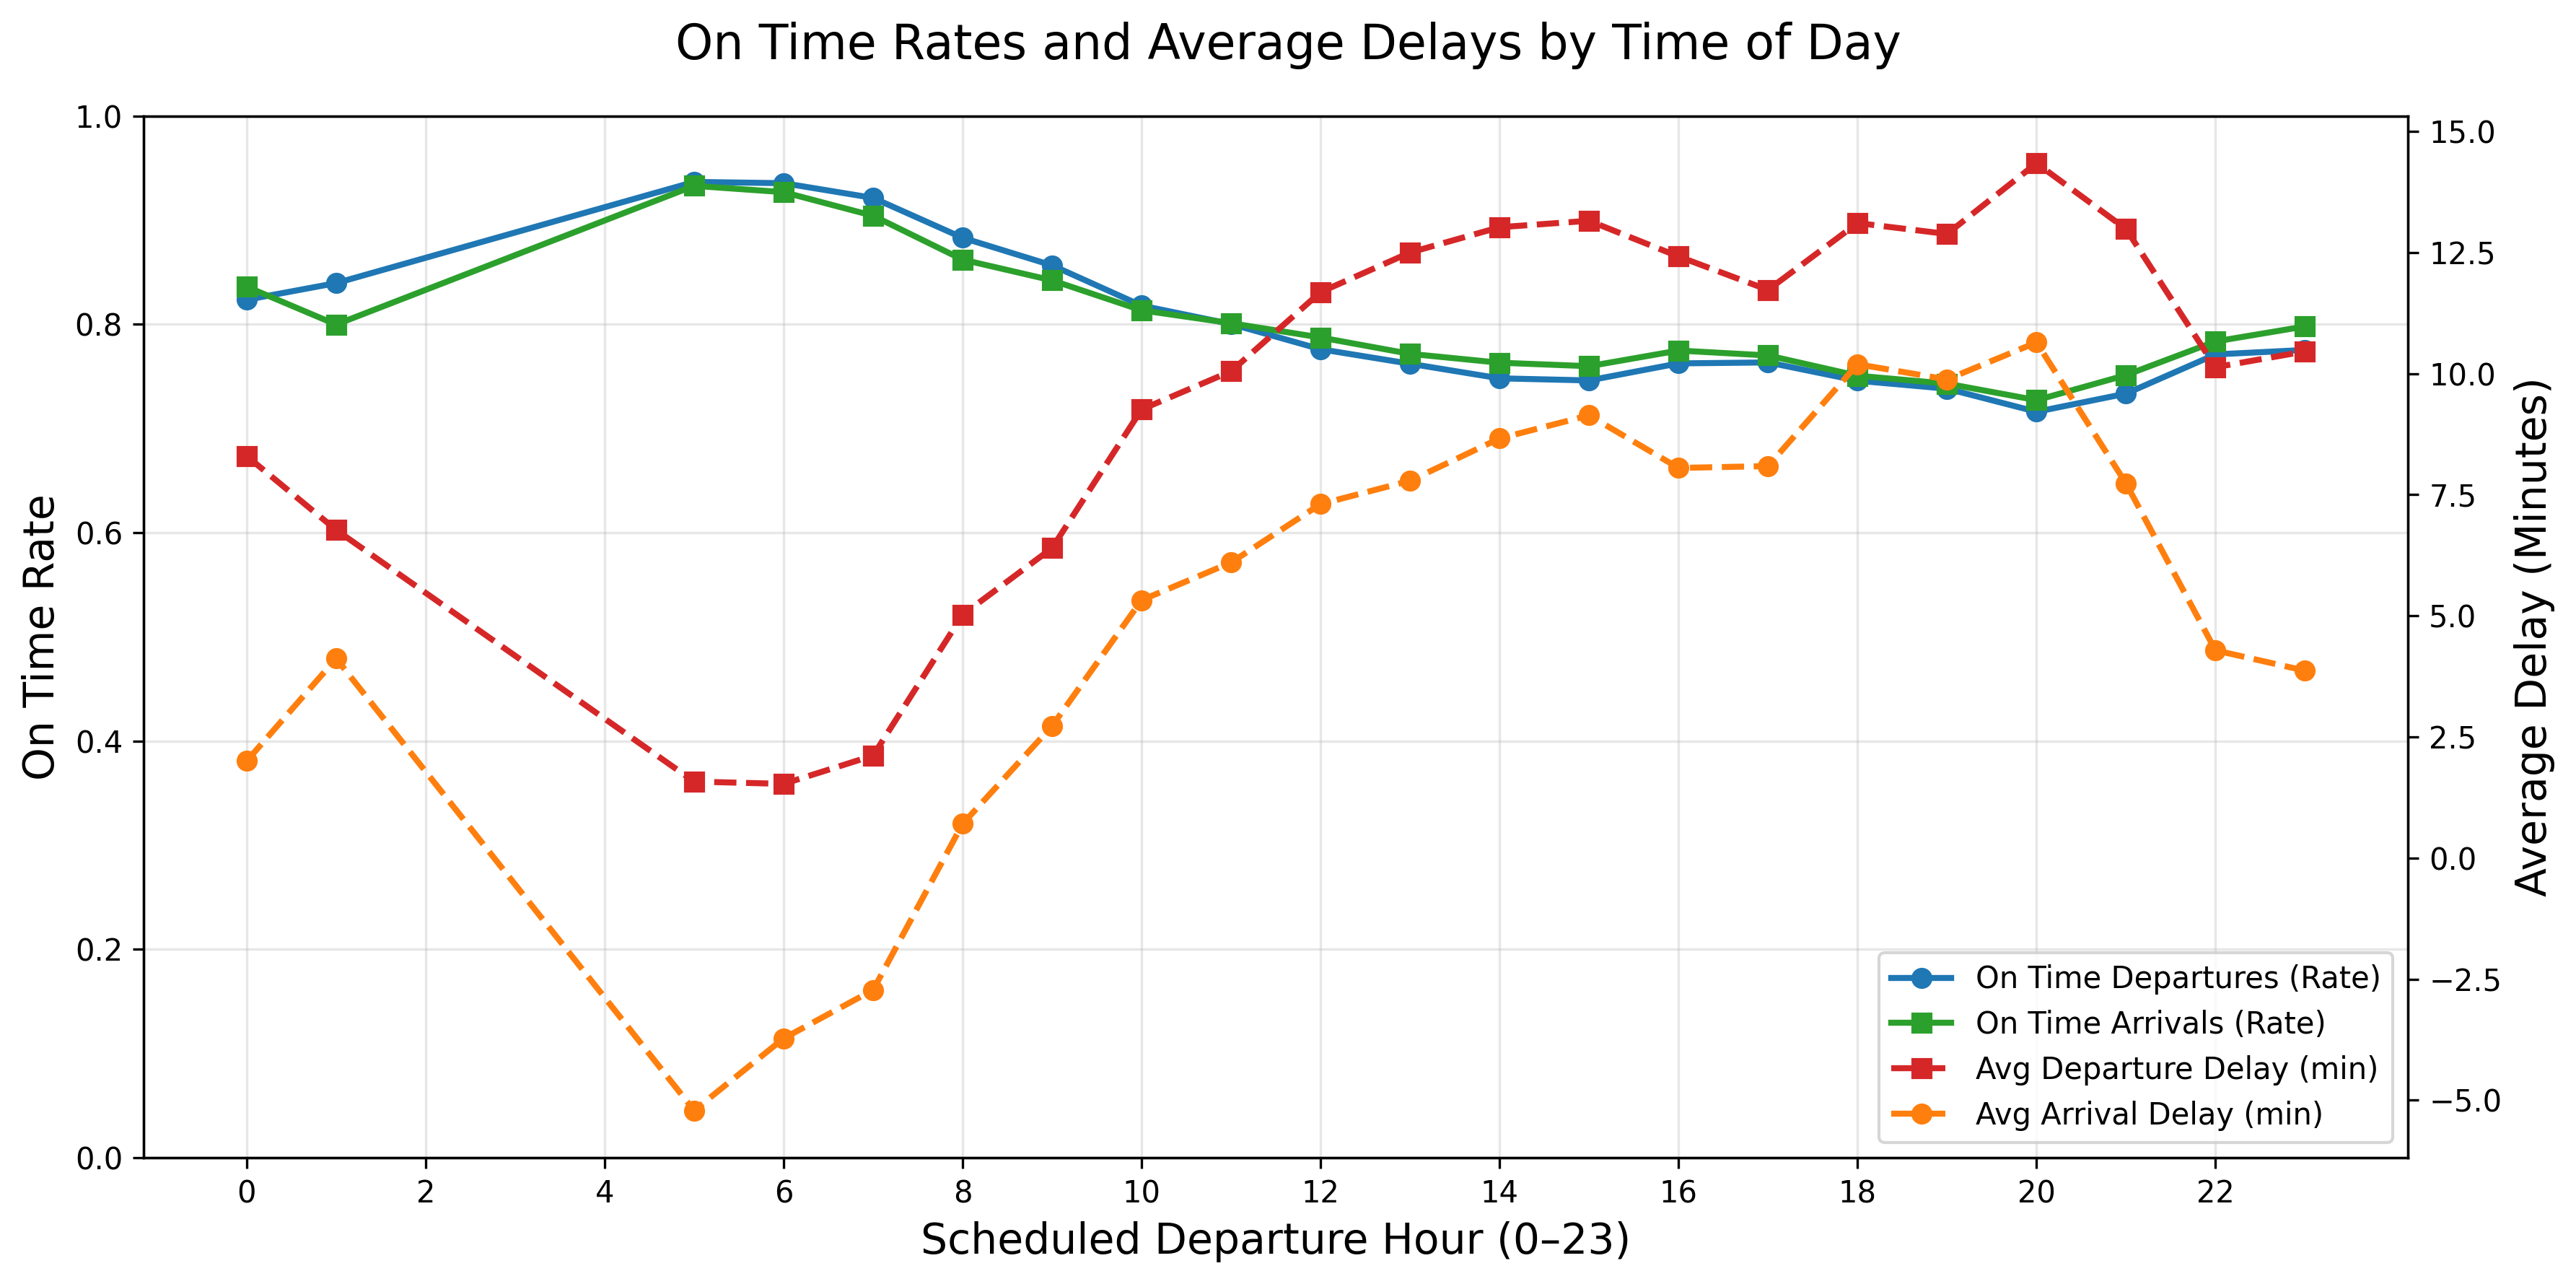

In [14]:
display(Image(filename="figures/delays_by_hour.png"))

**What this figure tells us?:** At around 5am, the on-time rates are the highest and the delays are the lowest which suggest that this is the “starting time” for many airports, their staff and travelers. In other words, this would be the begining of the day’s flights as if they start from zero and continue on so there is no previous flight to delay them at this time. The later flights after this, can be affected by congestion or delay build ups.

From about 7am to the end of the day, the graph shows that reliability is declining since the on-time departures and arrivals decreases while the average delays increase. This indicates delay propagation in which all the small delays from early morning start to accumulate and lead to longer delays for later flights. The worst performance for reliability and severity is around hour 18 to 21 (6pm to 9pm) in which the average delay reaches almost 15 minutes pass the already set delay definition. In this case, a flight in this time frame could be delayed at least almost 30 minutes from its original departure time.

Overall, the daily pattern is that early morning flights are the most reliable with shortest delays and flights between peak evening hours of 6pm to 9pm are the least reliable with the longest delays for this specific dataset.

# Predictions
This next section focuses on our prediction models (regressions, random forests and boosting algorithms) to predict delays in two different problems.

### Problem 1: Regression
How much will a given flight be delayed?

### Problem 2: Classification
Will the flight be delayed or not?

### Results

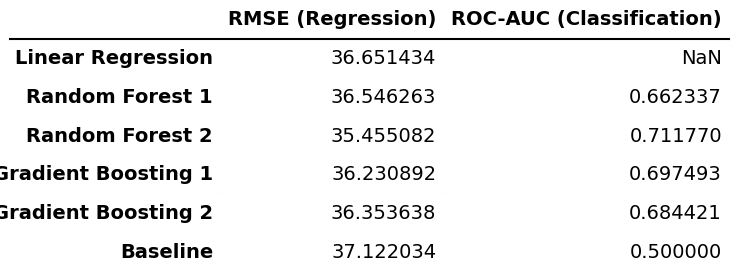

In [15]:
display(Image(filename="figures/performances_reg_cla.png"))

**What this figure tells us about problem 1?:** Across all regression models, the RMSE values are very similar and lie in the range of 35.46-36.65 minutes. Since the standard deviation of the arrival delay in the test set is 37.12 minutes, the predictive performance of all the regression models is very close to the simple baseline that predicts the mean delay (which would result in a RMSE equal to the standard deviation). This indicates that the variables used contain only limited information for predicting the exact magnitude of arrival delays, which is somewhat expected, as many of the actual drivers of delays, such as weather and air traffic congestion, are not explicitly included in the dataset.

**What this figure tells us about problem 2?:** For the classification task, the Random Forest and Gradient Boosting models achieve ROC-AUC scores of 0.66-0.71. These values are clearly above 0.5, which corresponds to random guessing, indicating a moderate but still limited ability to distinguish between on-time and delayed flights.

**Summary:** In summary, the results show that while the models are able to capture some structure in the data for delay classification, their ability to accurately predict the exact delay amount is limited.

### ROC Curve
**Why Receiver Operating Characteristic?:** This curve shows how well a binary classifier can distinguish between two things across all choices possible. In other words, does it predict well or is it just guessing? 

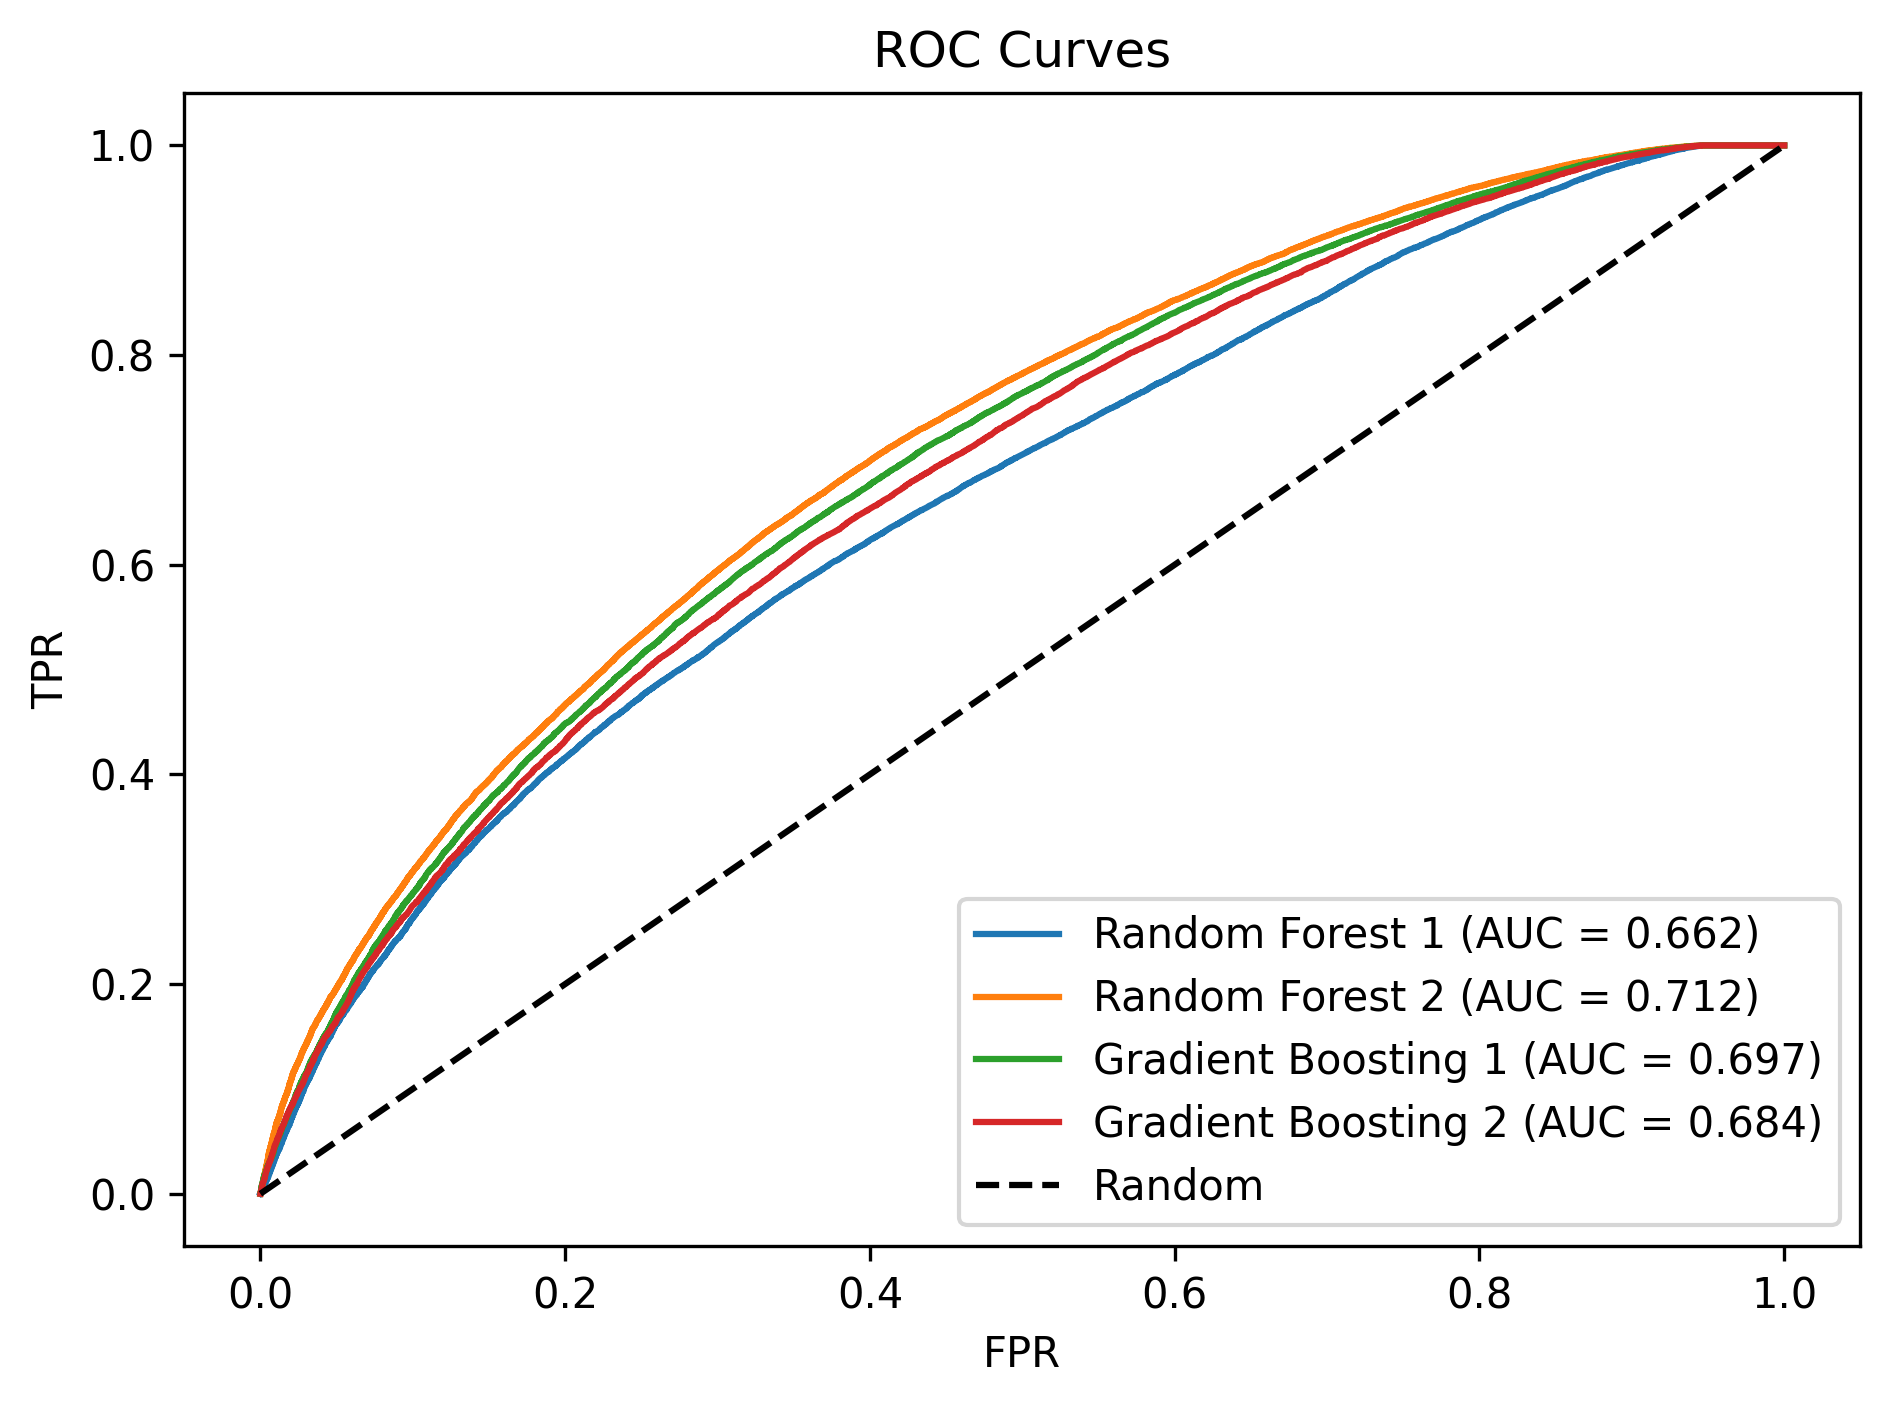

In [16]:
display(Image(filename="figures/classification_roc.png"))

**What this figure tells us?:** The ROC curves confirm that the Random Forest and Gradient Boosting classifiers achieve a moderate level of performance, with AUC values between 0.66-0.71, indicating a reasonable but still limited ability to distinguish between on-time and delayed flights.

# Conclusion
This project studied flight delays for domestic flights departing from California in 2015, focusing on airline and airport reliability, structural patterns in delays, time-based variation, and predictability. We found substantial differences in reliability across both airlines and airports, with airlines like Alaska Airlines and US Airways and airports like John Wayne Airport and BoB Hope Airport performing best, while bigger airports and some low-cost airlines experienced worse punctuality.

Clustering analyses showed clear structure in delay behavior. Airlines grouped according to performance profiles, and airports clustered largely by size and operational role. Delay patterns were also strongly time-dependent, and we saw that the fall months, early-morning flights, and midweek travel were the among the most reliable, while delays accumulated throughout the day and peaked during evening hours, resulting in delay congestions.

Finally, predictive models showed limited ability to forecast exact delay magnitudes and only moderate success in classifying whether a flight would be delayed, reflecting the absence in data of key external drivers such as weather and air traffic conditions. Overall, flight delays in California follow systematic and structured patterns, but precise prediction remains challenging with operational data alone.

# Author Contributions
Below, it is described what each team member did in this project.

#### Keval Darshan Amin
- Created the sections Delay by Month, Delay by Day of Month, and Delay by Day of Week sections in months_days.ipynb.

#### Keyla Jaylin Barcenas
- Completed Time of Day Delay Analysis in months_days.ipynb notebook.
- Created hhmm_to_hour helper function.
- Wrote majority of the following sections in for the main.ipynb notebook: Introduction, Research Questions, About the Data, Exploratory Data Analysis until before Conclusion.

#### Jakob Bjerre Eriksen
- Created and wrote get_data.ipynb.
- Created and wrote airlines_airports.ipynb.
- Created and wrote predictions.ipynb.
- Created and wrote README.md.
- Created the following functions in helper_functions.py: get_full_data, summarize_df, group_data_reliability, show_full_names, sort_on_time_rate, on_time_summary_table, on_time_bar_chart, plot_corr_matrix, group_data_clustering, hierarchical_clustering, preprocessor, train_models, roc_auc_plot.
- Created and wrote all tests in test_helper_functions.py.
- Wrote conclusions for the plots in the sections Delay by Month, Delay by Day of Month, and Delay by Day of Week sections in months_days.ipynb (but did not write the code).
- Wrote final conclusion in main.ipynb.
- Created Makefile.
- Created myst.yml and deployed project to GitHub Pages.
- Created environment.yml.
- Created the PDF builds of the notebooks.
- Created .gitignore.
- Created references.bib.
- Created LICENSE.
- Tagged the repository on GitHub and archived the release on Zenodo.
- Found logo and favicon for the web page.

#### Noa Adriana Gonzalez
.

# Other

```{bibliography}
```